# TODO
Specif Sensiti - trafnosci w poszczegolnych klasach naczynia tło, Prec - ... miary
porównanie sato z machine learning


# Segmenting Retinal Blood Vessels With Deep Neural Networks


In [25]:
import skimage as ski
from skimage import io, exposure, data, color, data, filters, graph, measure, morphology
import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from PIL import Image
from scipy import ndimage as ndi
import cv2
from imblearn.metrics import classification_report_imbalanced

from image_processing import *
from functions import *

filename = 'Data/01_dr.jpg'
mask_filename = 'Data/01_dr_mask.tif'
manual_filename = 'Data/01_dr.tif'

image = loadImage(filename)
mask = loadImageTif(mask_filename)
manual = loadImageTif(manual_filename)

# Sato filter

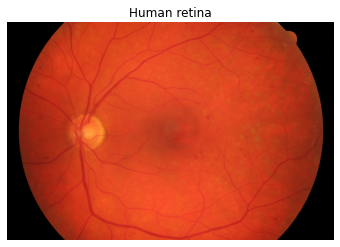

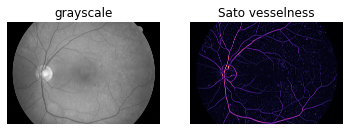

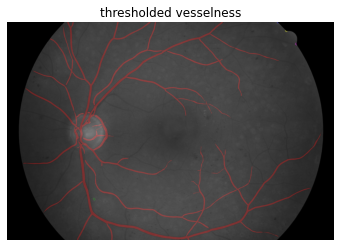

In [4]:
_, ax = plt.subplots()
ax.imshow(image)
ax.set_axis_off()
_ = ax.set_title('Human retina')

retina = color.rgb2gray(image)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

_, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)	#dont override vessels
labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('thresholded vesselness')


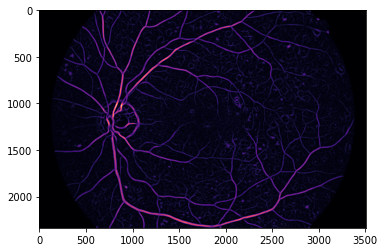

Add contrast and threshold to highlight vessels


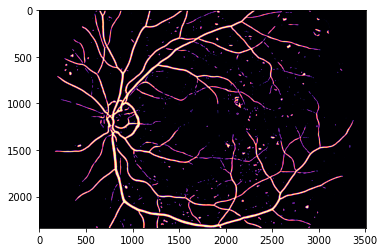

In [5]:
vessels = extract_vessels(image)
print("Extract vessels from retina image")
showImage(vessels, cmap='magma')
vessels = contrast(vessels)
vessels = threshold(vessels)
print("Add contrast and threshold to highlight vessels")
showImage(vessels, cmap='magma')

# Comparing vessels 

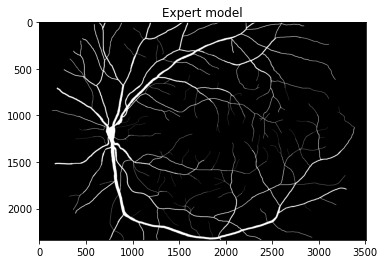

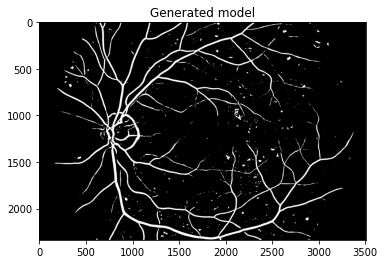

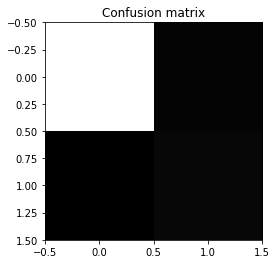

Confusion matrix: [7537842  231220  101964  314318]

Main metrics:
Accuracy score:		 0.959295
Sensitivity score:	 0.755060
Specificity score:	 0.970238
Precision score:	 0.576162
G-mean: 		 0.855914
Weighted average: 	 0.862649

Classification report with sklearn.metrics
              precision    recall  f1-score   support

  background       0.99      0.97      0.98   7769062
     vessels       0.58      0.76      0.65    416282

    accuracy                           0.96   8185344
   macro avg       0.78      0.86      0.82   8185344
weighted avg       0.97      0.96      0.96   8185344


Classification report with imblearn.metrics
                   pre       rec       spe        f1       geo       iba       sup

 background       0.99      0.97      0.76      0.98      0.86      0.75   7769062
    vessels       0.58      0.76      0.97      0.65      0.86      0.72    416282

avg / total       0.97      0.96      0.77      0.96      0.86      0.75   8185344



In [7]:
y_pred = vessels.flatten()		# True - żyły, False - tło
y_true = manual.flatten()		# 255 - żyły, 0 - tło
model_mask = (y_true > 0)		# maska pikseli, które reprezentują żyły w modelu ekspertskim

y_true_masked = np.zeros(y_true.shape, dtype=bool)		# utworzenie maski True/False dla modelu ekspertskiego
y_true_masked[model_mask] = True

accuracy = accuracy_score(y_true_masked.flatten(), y_pred.flatten())				# trafność - accuracy
sensitivity = recall_score(y_true_masked.flatten(), y_pred.flatten()) 				# czułość - sensitivity, recall
specificity = recall_score(y_true_masked.flatten(), y_pred.flatten(), pos_label=0)	# swoistość - specificity
precision = precision_score(y_true_masked.flatten(), y_pred.flatten()) 				# precyzja - precision

showImage(y_true_masked.reshape(vessels.shape), title="Expert model")
showImage(y_pred.reshape(vessels.shape), title="Generated model")
showImage(metrics.confusion_matrix(y_true_masked.flatten(), y_pred.flatten()), title="Confusion matrix")
print("Confusion matrix:", metrics.confusion_matrix(y_true_masked.flatten(), y_pred.flatten()).flatten(), end="\n\n")

print("Main metrics:")
print(f"Accuracy score:\t\t {accuracy:.6f}")
print(f"Sensitivity score:\t {sensitivity:.6f}")
print(f"Specificity score:\t {specificity:.6f}")
print(f"Precision score:\t {precision:.6f}")
print("G-mean: \t\t", round(np.sqrt(sensitivity * specificity), 6))
print("Weighted average: \t", round((sensitivity + specificity) / 2, 6))

print("\nClassification report with sklearn.metrics")
print(classification_report(y_true_masked.flatten(), y_pred.flatten(), target_names=["background", "vessels"]))
print("\nClassification report with imblearn.metrics")
print(classification_report_imbalanced(y_true_masked, y_pred, target_names=['background', 'vessels']))

# tn, fp, fn, tp = confusion_matrix(y_true_masked, y_pred).ravel()
# specificity = tn / (tn+fp)												# daje ten sam rezultat co recall_score(y_true_masked, y_pred, pos_label=0)
# y_pred_masked = np.zeros(y_pred.shape, dtype=bool)
# y_pred_masked[model_mask] = (y_pred[model_mask] > 0)
# showImage(y_pred_masked.reshape(vessels.shape))

# Compare 5 images using non-machine learning methods (sato filter)

----------------------------------
Retina number:  1
----------------------------------
Accuracy score:		 0.959295
Sensitivity score:	 0.755060
Specificity score:	 0.970238
Precision score:	 0.576162
G-mean: 		 0.855914
Weighted average: 	 0.862649

Classification report with imblearn.metrics
                   pre       rec       spe        f1       geo       iba       sup

 background       0.99      0.97      0.76      0.98      0.86      0.75   7769062
    vessels       0.58      0.76      0.97      0.65      0.86      0.72    416282

avg / total       0.97      0.96      0.77      0.96      0.86      0.75   8185344



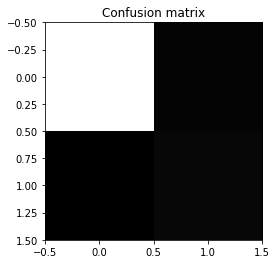

[[7537842  231220]
 [ 101964  314318]]


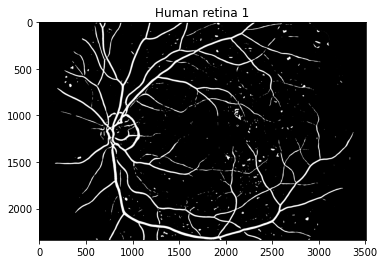

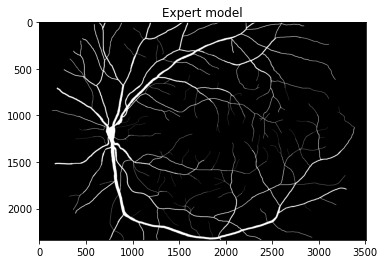

----------------------------------
Retina number:  2
----------------------------------
Accuracy score:		 0.955742
Sensitivity score:	 0.719289
Specificity score:	 0.971845
Precision score:	 0.635004
G-mean: 		 0.836084
Weighted average: 	 0.845567

Classification report with imblearn.metrics
                   pre       rec       spe        f1       geo       iba       sup

 background       0.98      0.97      0.72      0.98      0.84      0.72   7663466
    vessels       0.64      0.72      0.97      0.67      0.84      0.68    521878

avg / total       0.96      0.96      0.74      0.96      0.84      0.71   8185344



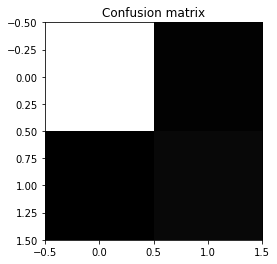

[[7447700  215766]
 [ 146497  375381]]


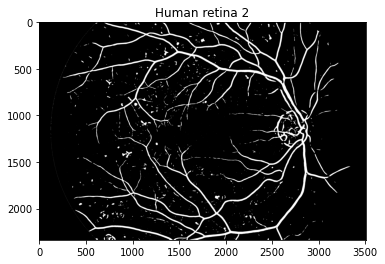

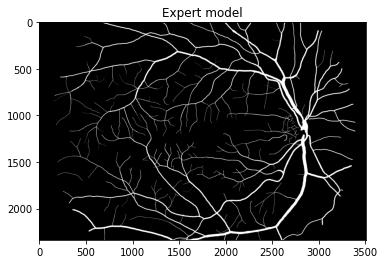

----------------------------------
Retina number:  3
----------------------------------
Accuracy score:		 0.921585
Sensitivity score:	 0.744557
Specificity score:	 0.932965
Precision score:	 0.416566
G-mean: 		 0.833454
Weighted average: 	 0.838761

Classification report with imblearn.metrics
                   pre       rec       spe        f1       geo       iba       sup

 background       0.98      0.93      0.74      0.96      0.83      0.71   7690944
    vessels       0.42      0.74      0.93      0.53      0.83      0.68    494400

avg / total       0.95      0.92      0.76      0.93      0.83      0.71   8185344



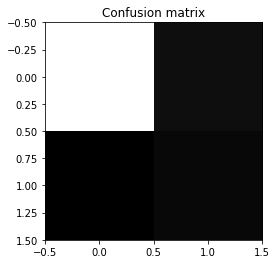

[[7175378  515566]
 [ 126291  368109]]


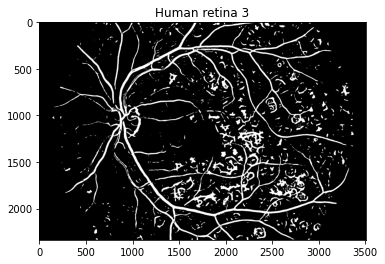

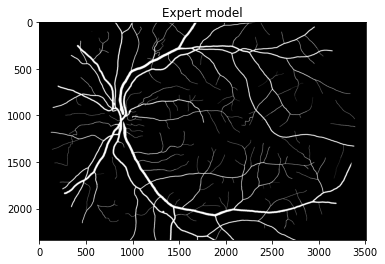

----------------------------------
Retina number:  4
----------------------------------
Accuracy score:		 0.937877
Sensitivity score:	 0.680282
Specificity score:	 0.953292
Precision score:	 0.465698
G-mean: 		 0.8053
Weighted average: 	 0.816787

Classification report with imblearn.metrics
                   pre       rec       spe        f1       geo       iba       sup

 background       0.98      0.95      0.68      0.97      0.81      0.67   7723165
    vessels       0.47      0.68      0.95      0.55      0.81      0.63    462179

avg / total       0.95      0.94      0.70      0.94      0.81      0.66   8185344



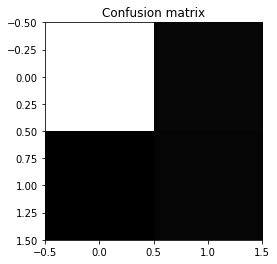

[[7362435  360730]
 [ 147767  314412]]


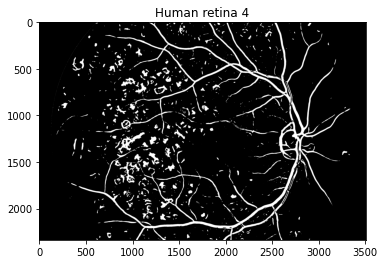

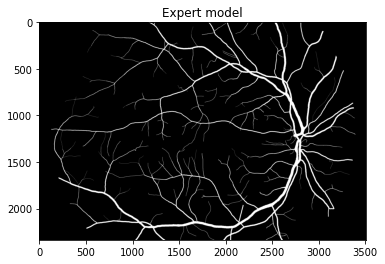

----------------------------------
Retina number:  5
----------------------------------
Accuracy score:		 0.963099
Sensitivity score:	 0.789136
Specificity score:	 0.974633
Precision score:	 0.673490
G-mean: 		 0.876994
Weighted average: 	 0.881885

Classification report with imblearn.metrics
                   pre       rec       spe        f1       geo       iba       sup

 background       0.99      0.97      0.79      0.98      0.88      0.78   7676366
    vessels       0.67      0.79      0.97      0.73      0.88      0.75    508978

avg / total       0.97      0.96      0.80      0.96      0.88      0.78   8185344



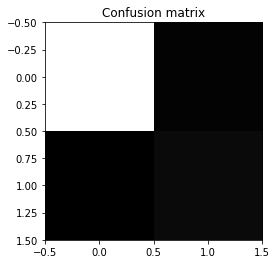

[[7481643  194723]
 [ 107325  401653]]


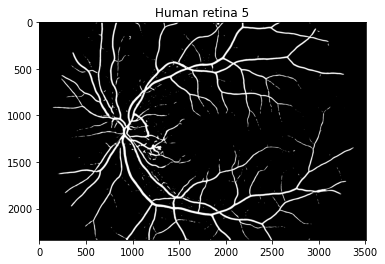

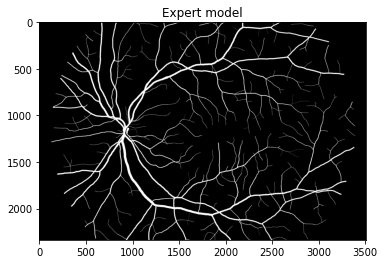

----------------------------------
Retina number:  6
----------------------------------
Accuracy score:		 0.936344
Sensitivity score:	 0.642916
Specificity score:	 0.960306
Precision score:	 0.569460
G-mean: 		 0.785745
Weighted average: 	 0.801611

Classification report with imblearn.metrics
                   pre       rec       spe        f1       geo       iba       sup

 background       0.97      0.96      0.64      0.97      0.79      0.64   7567378
    vessels       0.57      0.64      0.96      0.60      0.79      0.60    617966

avg / total       0.94      0.94      0.67      0.94      0.79      0.63   8185344



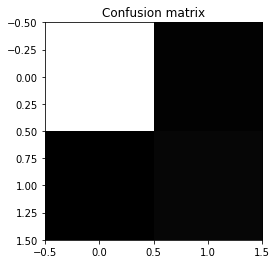

[[7266999  300379]
 [ 220666  397300]]


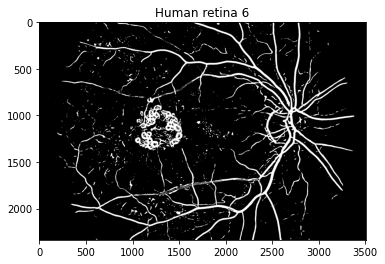

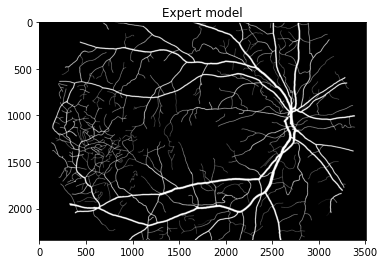

In [ ]:
number_of_images = 5

for number in range(1,number_of_images+2):
	print("----------------------------------")
	print("Retina number: ", number)
	print("----------------------------------")
	filenameN = 'Data/0' + str(number) + '_dr.jpg'
	mask_filenameN = 'Data/0' + str(number) + '_dr_mask.tif'
	manual_filenameN = 'Data/0' + str(number) + '_dr.tif'

	imageN = loadImage(filenameN)
	maskN = loadImageTif(mask_filenameN)
	manualN = loadImageTif(manual_filenameN)

	vesselsN = extract_and_use_vessels(imageN)
	cm = show_stats(vessels, manualN, reportlib = 'imblearn')
	showImage(cm, title="Confusion matrix")
	print(cm)
	showImage(vessels, title="Human retina "+str(number))
	showImage(manualN, title="Expert model")

# REST

In [ ]:
both_vessels = np.logical_and(vessels, manual)
wrong_vessels = np.logical_xor(vessels, manual)
all_vessels = np.logical_or(vessels, manual)
print("Sensitivity:" , round(sum(both_vessels.flatten() + sum(wrong_vessels.flatten())) / sum(all_vessels.flatten())*100, 3), "%")

<ipython-input-163-5da2418774eb>:4: RuntimeWarning: overflow encountered in scalar add
  print("Sensitivity:" , round(sum(both_vessels.flatten() + sum(wrong_vessels.flatten())) / sum(all_vessels.flatten())*100, 3), "%")


Sensitivity: -12086.966 %


# Machine learning

### Wymagania na 4.0


Po wstępnym przetworzeniu obrazu należy podzielić go na wycinki (np. 5x5 px) i dla każdej z nich dokonać ekstrakcji cech z obrazu: np. wariancja kolorów, momenty centralne, momenty Hu itp. Wartości te wraz z informacją pochodzącą z maski eksperckiej (decyzja dla środkowego piksela wycinka) stanowić będą zbiór danych wykorzystany do budowy wybranego klasyfikatora, prostszego niż głęboka sieć neuronowa (np. kNN, drzewo lub las decyzyjny, SVM). Należy skorzystać z gotowej implementacji klasyfikatora (np. w bibliotece scikit-learn).


Z uwagi na ograniczenia pamięciowe konieczne może być ograniczenie rozmiaru zbioru uczącego poprzez losowy wybór punktów (możliwość zastosowania undersampling-u do zrównoważenia rozkładu klas w zbiorze uczącym).


Zdolności predykcyjne tak opracowanego klasyfikatora należy wstępnie zweryfikować na niezależnym zbiorze testowym hold-out (np. pochodzącym z innej części obrazu lub z innego obrazu). 


Gotowy klasyfikator powinien zostać osadzony w aplikacji, a jego działanie powinno zostać zwizualizowane i przetestowane w taki sam sposób, jak działanie technik przetwarzania obrazu z wymagań podstawowych.


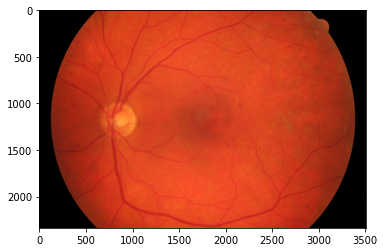

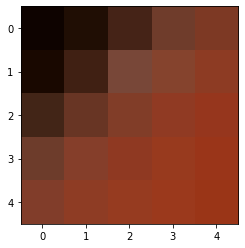

Central moments:
M00: 11.168627450980392
M10: 26.188235294117646
M01: 26.12549019607843
M11: 57.33333333333333
M20: 81.40392156862745
M02: 81.38823529411765
Fragment:  0 615 Variance:  0.027747998462129952 0.004849187235678585 0.0028147697039600152
Cx:  2.344803370786517
Cy:  2.3391853932584272


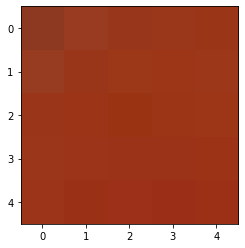

Central moments:
M00: 15.133333333333333
M10: 30.458823529411763
M01: 30.470588235294123
M11: 61.07058823529412
M20: 91.47058823529412
M02: 91.45882352941177
Fragment:  0 620 Variance:  0.00014994848135332578 0.0001632356785851596 0.00018784159938485211
Cx:  2.0126975900492354
Cy:  2.0134749935216383


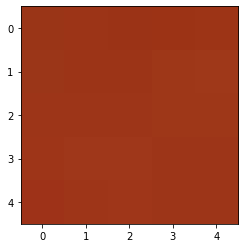

Central moments:
M00: 15.403921568627451
M10: 30.854901960784314
M01: 30.917647058823533
M11: 61.80392156862746
M20: 92.59607843137255
M02: 92.8078431372549
Fragment:  0 625 Variance:  2.6229911572472196e-05 3.1594002306805086e-05 1.845444059976932e-05
Cx:  2.0030549898167007
Cy:  2.007128309572302


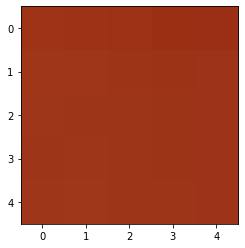

Central moments:
M00: 15.411764705882353
M10: 30.717647058823527
M01: 30.84313725490196
M11: 61.549019607843135
M20: 92.07450980392156
M02: 92.5529411764706
Fragment:  0 630 Variance:  1.8454440599769343e-05 6.387697039600149e-05 4.1977700884275275e-05
Cx:  1.993129770992366
Cy:  2.0012722646310435


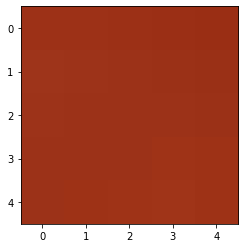

Central moments:
M00: 15.352941176470589
M10: 30.670588235294115
M01: 30.819607843137256
M11: 61.74509803921569
M20: 91.94117647058823
M02: 92.6313725490196
Fragment:  0 635 Variance:  3.44482891195695e-05 2.8936562860438293e-05 2.6180699730872738e-05
Cx:  1.9977011494252872
Cy:  2.0074074074074075


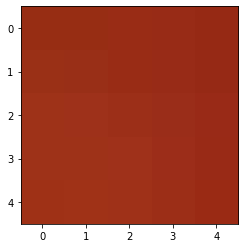

Central moments:
M00: 15.176470588235293
M10: 30.15686274509804
M01: 30.682352941176468
M11: 60.858823529411765
M20: 90.15686274509804
M02: 92.32156862745099
Fragment:  0 640 Variance:  0.00014394463667820085 0.00014355094194540557 5.767627835447904e-05
Cx:  1.9870801033591732
Cy:  2.021705426356589


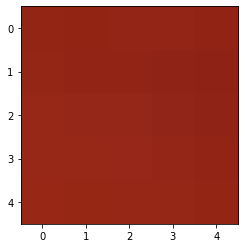

Central moments:
M00: 14.466666666666665
M10: 28.690196078431374
M01: 29.145098039215686
M11: 57.74901960784314
M20: 85.76470588235294
M02: 87.70196078431373
Fragment:  0 645 Variance:  0.00011205536332179951 4.689888504421377e-05 3.405459438677431e-05
Cx:  1.9831932773109247
Cy:  2.0146381133098403


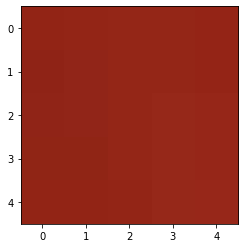

Central moments:
M00: 14.439215686274512
M10: 29.14117647058824
M01: 28.917647058823533
M11: 58.450980392156865
M20: 87.64313725490197
M02: 86.83921568627451
Fragment:  0 650 Variance:  7.445751633986955e-05 2.716493656286042e-05 2.7460207612456752e-05
Cx:  2.0181966322650733
Cy:  2.002715915263444


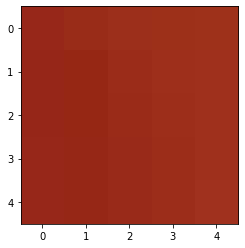

Central moments:
M00: 15.12156862745098
M10: 30.69411764705882
M01: 30.192156862745097
M11: 61.317647058823525
M20: 92.6
M02: 90.56078431372549
Fragment:  0 655 Variance:  0.00018365859284890425 0.00023606920415224905 8.302037677816225e-05
Cx:  2.0298236514522823
Cy:  1.9966286307053942


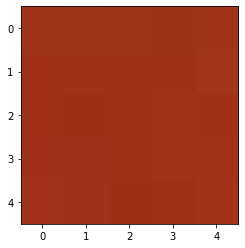

Central moments:
M00: 15.733333333333333
M10: 31.537254901960782
M01: 31.50588235294118
M11: 63.15294117647059
M20: 94.7843137254902
M02: 94.58823529411765
Fragment:  0 660 Variance:  2.3523260284505793e-05 3.872971933871589e-05 2.7164936562860437e-05
Cx:  2.0044865403788634
Cy:  2.002492522432702


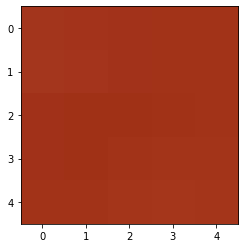

Central moments:
M00: 15.905882352941175
M10: 31.84313725490196
M01: 31.831372549019605
M11: 63.85490196078431
M20: 95.58431372549018
M02: 95.61960784313725
Fragment:  0 665 Variance:  2.6180699730872894e-05 3.43498654363706e-05 5.226297577854672e-05
Cx:  2.0019723865877714
Cy:  2.001232741617357


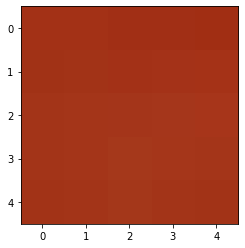

Central moments:
M00: 16.007843137254902
M10: 32.07843137254902
M01: 32.07843137254902
M11: 64.30196078431372
M20: 96.27450980392156
M02: 96.15686274509804
Fragment:  0 670 Variance:  3.385774702037705e-05 9.414225297962322e-05 5.9054209919261824e-05
Cx:  2.0039196472317493
Cy:  2.0039196472317493


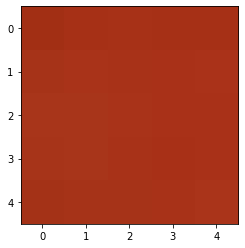

Central moments:
M00: 16.415686274509802
M10: 32.97647058823529
M01: 32.87843137254902
M11: 66.07843137254902
M20: 99.03137254901961
M02: 98.50196078431372
Fragment:  0 675 Variance:  5.177085736255269e-05 4.2961937716262994e-05 3.134794309880815e-05
Cx:  2.0088389870998564
Cy:  2.0028666985188726


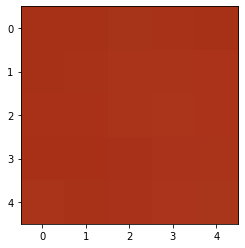

Central moments:
M00: 16.560784313725488
M10: 33.2156862745098
M01: 33.2
M11: 66.57254901960783
M20: 99.74117647058821
M02: 99.58431372549019
Fragment:  0 680 Variance:  2.9428681276431933e-05 3.951710880430601e-05 3.567858515955401e-05
Cx:  2.0056831636277526
Cy:  2.0047359696897944


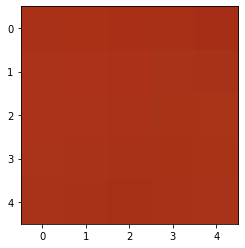

Central moments:
M00: 16.52549019607843
M10: 32.93333333333333
M01: 32.94509803921569
M11: 65.76470588235293
M20: 98.69019607843137
M02: 98.6
Fragment:  0 685 Variance:  5.6692041522491065e-05 3.971395617070357e-05 2.790311418685121e-05
Cx:  1.9928808732795444
Cy:  1.9935927859515903


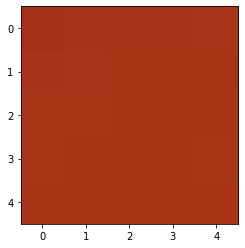

Central moments:
M00: 16.501960784313724
M10: 32.984313725490196
M01: 32.96862745098039
M11: 65.93333333333334
M20: 98.97647058823529
M02: 98.89803921568627
Fragment:  0 690 Variance:  2.057054978854272e-05 2.337562475970778e-05 3.444828911956939e-05
Cx:  1.9988117870722435
Cy:  1.9978612167300382


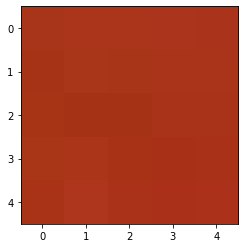

Central moments:
M00: 16.580392156862743
M10: 33.2313725490196
M01: 33.192156862745094
M11: 66.4470588235294
M20: 99.74117647058823
M02: 99.81176470588234
Fragment:  0 695 Variance:  6.0678200692041264e-05 4.783391003460207e-05 7.24398308342945e-05
Cx:  2.0042573320719015
Cy:  2.0018921475875118


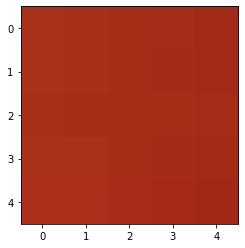

Central moments:
M00: 16.266666666666666
M10: 32.219607843137254
M01: 32.62352941176471
M11: 64.53725490196078
M20: 96.34509803921569
M02: 97.96470588235294
Fragment:  0 700 Variance:  9.955555555555546e-05 0.00011441753171856977 3.184006151480201e-05
Cx:  1.9807135969141756
Cy:  2.0055448408871746


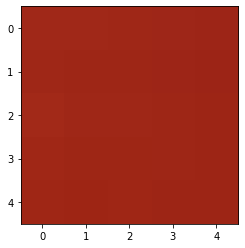

Central moments:
M00: 15.52156862745098
M10: 30.898039215686275
M01: 31.023529411764706
M11: 61.78431372549019
M20: 92.5529411764706
M02: 93.04705882352941
Fragment:  0 705 Variance:  2.549173394848117e-05 2.007843137254902e-05 2.0521337946943483e-05
Cx:  1.9906518443658414
Cy:  1.9987367357251138


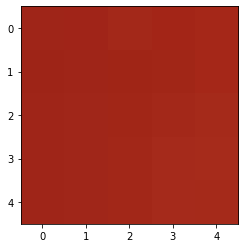

Central moments:
M00: 15.858823529411763
M10: 32.03921568627452
M01: 31.760784313725487
M11: 64.1921568627451
M20: 96.47058823529412
M02: 95.36862745098038
Fragment:  0 710 Variance:  9.507727797001168e-05 6.338485198000766e-05 2.59838523644752e-05
Cx:  2.0202769535113756
Cy:  2.0027200791295745


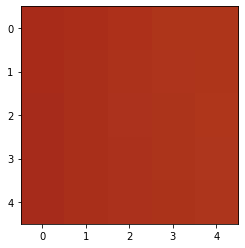

Central moments:
M00: 16.75294117647059
M10: 33.85490196078431
M01: 33.41568627450981
M11: 67.53725490196078
M20: 101.83921568627451
M02: 100.16078431372549
Fragment:  0 715 Variance:  0.00011235063437139582 0.00022105959246443668 1.909419454056132e-05
Cx:  2.020833333333333
Cy:  1.9946161048689142


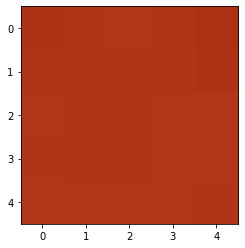

Central moments:
M00: 17.215686274509807
M10: 34.50588235294117
M01: 34.41568627450981
M11: 69.0392156862745
M20: 103.54901960784315
M02: 103.16862745098041
Fragment:  0 720 Variance:  2.2145328719723024e-05 2.7164936562860414e-05 4.798154555940022e-05
Cx:  2.004328018223234
Cy:  1.9990888382687928


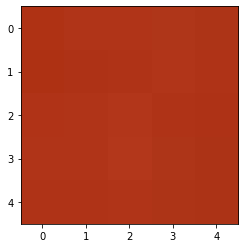

Central moments:
M00: 17.16470588235294
M10: 34.239215686274505
M01: 34.30588235294118
M11: 68.34901960784313
M20: 102.49019607843138
M02: 102.82352941176471
Fragment:  0 725 Variance:  4.050134563629345e-05 2.7952326028450584e-05 4.123952326028451e-05
Cx:  1.9947452593100294
Cy:  1.9986291980808777


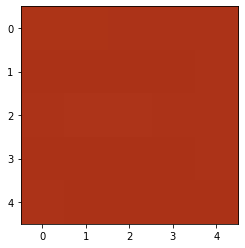

Central moments:
M00: 16.831372549019605
M10: 33.654901960784315
M01: 33.6156862745098
M11: 67.2235294117647
M20: 100.97254901960784
M02: 100.79999999999998
Fragment:  0 730 Variance:  8.267589388696882e-06 8.267589388696667e-06 6.2991157247212615e-06
Cx:  1.9995340167753965
Cy:  1.9972041006523766


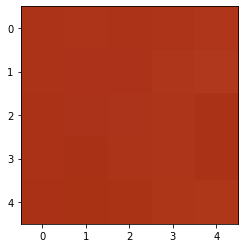

Central moments:
M00: 16.858823529411765
M10: 33.83529411764705
M01: 33.603921568627456
M11: 67.45882352941176
M20: 101.64705882352939
M02: 100.72549019607844
Fragment:  0 735 Variance:  4.611149557862386e-05 5.290272971933871e-05 6.535332564398307e-05
Cx:  2.006978367062107
Cy:  1.9932542451732964


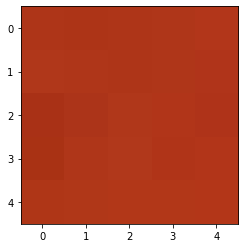

Central moments:
M00: 17.176470588235297
M10: 34.57254901960784
M01: 34.44313725490196
M11: 69.39999999999999
M20: 103.89019607843136
M02: 103.54117647058824
Fragment:  0 740 Variance:  9.350249903883098e-05 4.1239523260284504e-05 3.08558246828143e-05
Cx:  2.0127853881278535
Cy:  2.0052511415525114


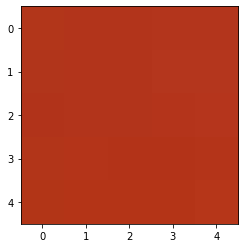

Central moments:
M00: 17.54901960784314
M10: 35.2235294117647
M01: 35.17254901960784
M11: 70.6156862745098
M20: 105.80392156862746
M02: 105.61960784313726
Fragment:  0 745 Variance:  2.3375624759708088e-05 1.2401384083044978e-05 5.290272971933871e-05
Cx:  2.0071508379888265
Cy:  2.0042458100558656


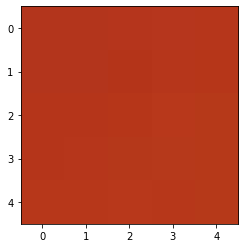

Central moments:
M00: 17.79607843137255
M10: 35.68235294117647
M01: 35.70980392156863
M11: 71.48627450980392
M20: 107.10980392156863
M02: 107.27058823529413
Fragment:  0 750 Variance:  3.090503652441382e-05 3.577700884275279e-05 2.106266820453672e-05
Cx:  2.0050683120317316
Cy:  2.00661084178052


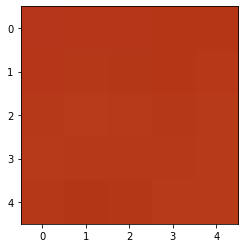

Central moments:
M00: 17.827450980392157
M10: 35.678431372549014
M01: 35.65882352941177
M11: 71.44313725490196
M20: 107.12156862745098
M02: 106.91372549019607
Fragment:  0 755 Variance:  2.0521337946943435e-05 6.289273356401389e-05 3.238139177239523e-05
Cx:  2.0013198416190052
Cy:  2.000219973603168


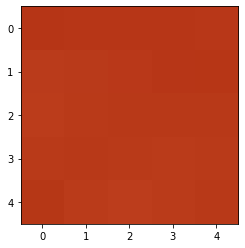

Central moments:
M00: 18.08627450980392
M10: 36.152941176470584
M01: 36.27058823529412
M11: 72.54117647058823
M20: 108.39607843137256
M02: 108.85882352941178
Fragment:  0 760 Variance:  3.336562860438281e-05 7.096347558631297e-05 3.9517108804306034e-05
Cx:  1.998915871639202
Cy:  2.00542064180399


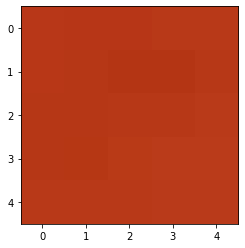

Central moments:
M00: 17.980392156862745
M10: 36.035294117647055
M01: 36.03921568627451
M11: 72.30588235294117
M20: 108.24705882352941
M02: 108.27450980392157
Fragment:  0 765 Variance:  3.690888119953838e-05 4.419223375624758e-05 4.6160707420222985e-05
Cx:  2.0041439476553977
Cy:  2.004362050163577


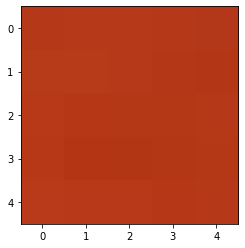

Central moments:
M00: 17.784313725490197
M10: 35.4078431372549
M01: 35.627450980392155
M11: 70.90980392156862
M20: 106.09019607843138
M02: 107.02352941176471
Fragment:  0 770 Variance:  5.044213763936949e-05 2.9920799692426003e-05 4.19284890426759e-05
Cx:  1.9909592061742005
Cy:  2.0033076074972436


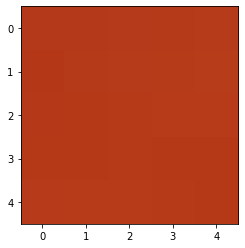

Central moments:
M00: 17.80392156862745
M10: 35.65882352941176
M01: 35.66274509803922
M11: 71.32156862745097
M20: 107.0078431372549
M02: 107.03529411764706
Fragment:  0 775 Variance:  1.476355247981535e-05 1.9291041906958855e-05 2.3375624759707807e-05
Cx:  2.0028634361233477
Cy:  2.0030837004405284


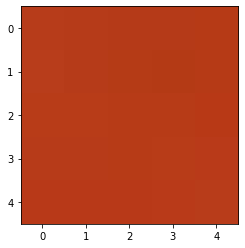

Central moments:
M00: 17.941176470588236
M10: 35.86666666666666
M01: 36.01176470588236
M11: 72.06666666666666
M20: 107.65490196078431
M02: 108.15294117647059
Fragment:  0 780 Variance:  2.5836216839676858e-05 1.8109957708573618e-05 3.134794309880815e-05
Cx:  1.999125683060109
Cy:  2.0072131147540984


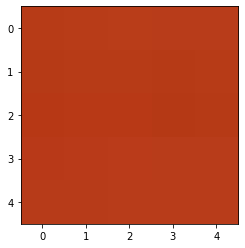

Central moments:
M00: 17.992156862745098
M10: 35.984313725490196
M01: 36.0078431372549
M11: 72.01568627450979
M20: 107.89803921568627
M02: 108.09411764705882
Fragment:  0 785 Variance:  1.737178008458273e-05 2.460592079969241e-05 4.798154555940023e-05
Cx:  2.0
Cy:  2.0013077593722755


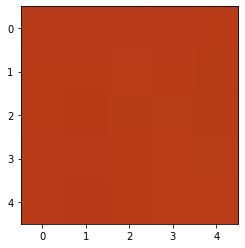

Central moments:
M00: 17.99607843137255
M10: 36.015686274509804
M01: 36.015686274509804
M11: 72.16078431372549
M20: 108.06274509803922
M02: 108.10980392156864
Fragment:  0 790 Variance:  1.4861976163014119e-05 2.0275278738946548e-05 2.3375624759707807e-05
Cx:  2.001307474395293
Cy:  2.001307474395293


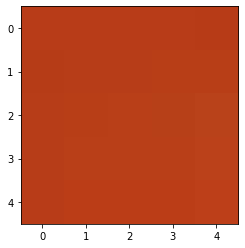

Central moments:
M00: 18.094117647058823
M10: 36.28235294117647
M01: 36.34117647058824
M11: 72.97647058823529
M20: 108.91764705882353
M02: 109.27450980392157
Fragment:  0 795 Variance:  4.192848904267575e-05 4.394617454825069e-05 1.0236063052672048e-05
Cx:  2.0052015604681404
Cy:  2.0084525357607284


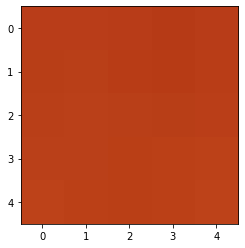

Central moments:
M00: 18.188235294117646
M10: 36.37647058823529
M01: 36.56470588235294
M11: 73.18823529411765
M20: 109.20784313725491
M02: 109.92156862745098
Fragment:  0 800 Variance:  4.3207996924259915e-05 6.412302960399847e-05 2.0915032679738563e-05
Cx:  2.0
Cy:  2.0103492884864167


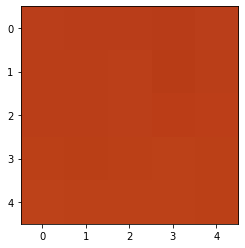

Central moments:
M00: 18.29019607843137
M10: 36.58039215686274
M01: 36.71372549019608
M11: 73.41960784313726
M20: 109.76470588235293
M02: 110.27450980392157
Fragment:  0 805 Variance:  2.3474048442906742e-05 4.059976931949248e-05 1.5993848519800075e-05
Cx:  2.0
Cy:  2.0072898799313896


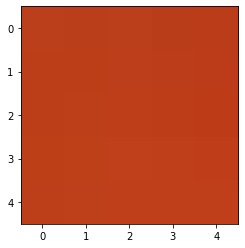

Central moments:
M00: 18.521568627450982
M10: 37.08627450980392
M01: 37.247058823529414
M11: 74.64705882352942
M20: 111.25882352941177
M02: 111.88235294117646
Fragment:  0 810 Variance:  4.5422529796232336e-05 2.5442522106881964e-05 2.1259515570934257e-05
Cx:  2.0023290281600676
Cy:  2.0110099513021384


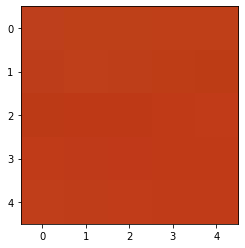

Central moments:
M00: 18.71764705882353
M10: 37.49803921568627
M01: 37.53725490196078
M11: 75.1921568627451
M20: 112.54117647058823
M02: 112.75294117647059
Fragment:  0 815 Variance:  2.4507497116493482e-05 7.95755478662053e-05 3.749942329873126e-05
Cx:  2.0033521893987007
Cy:  2.0054473077728887


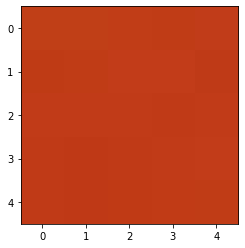

Central moments:
M00: 18.862745098039216
M10: 37.7686274509804
M01: 37.70980392156862
M11: 75.52156862745097
M20: 113.3294117647059
M02: 113.08235294117647
Fragment:  0 820 Variance:  1.2302960399846126e-05 3.385774702037679e-05 2.130872741253364e-05
Cx:  2.0022869022869023
Cy:  1.9991683991683988


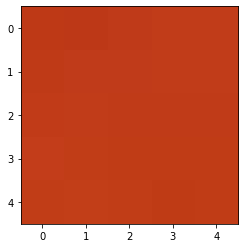

Central moments:
M00: 18.847058823529412
M10: 37.69411764705882
M01: 37.76078431372549
M11: 75.35686274509804
M20: 113.10588235294118
M02: 113.30588235294118
Fragment:  0 825 Variance:  2.2489811610918715e-05 2.59838523644752e-05 3.110188389081122e-05
Cx:  1.9999999999999996
Cy:  2.0035372451102784


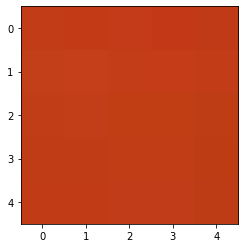

Central moments:
M00: 18.95294117647059
M10: 37.80392156862745
M01: 37.745098039215684
M11: 75.24313725490197
M20: 113.15294117647059
M02: 113.08627450980391
Fragment:  0 830 Variance:  6.240061514801991e-05 3.725336409073436e-05 4.217454825067282e-05
Cx:  1.994620318642665
Cy:  1.9915166563211255


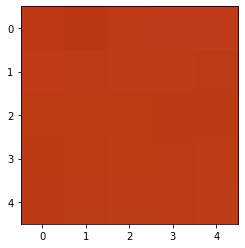

Central moments:
M00: 18.482352941176472
M10: 36.9921568627451
M01: 36.83529411764706
M11: 73.75294117647059
M20: 111.0470588235294
M02: 110.47450980392158
Fragment:  0 835 Variance:  3.8286812764321515e-05 2.5688581314878896e-05 6.604229142637446e-05
Cx:  2.0014852535539993
Cy:  1.9929980903882876


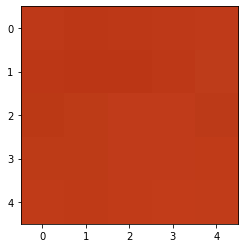

Central moments:
M00: 18.643137254901962
M10: 37.4
M01: 37.45490196078431
M11: 75.15686274509804
M20: 112.28627450980392
M02: 112.65490196078431
Fragment:  0 840 Variance:  6.35816993464051e-05 5.0442137639369495e-05 3.848366013071895e-05
Cx:  2.0061001262095077
Cy:  2.0090450147244425


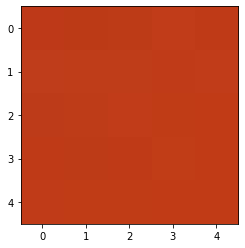

Central moments:
M00: 18.764705882352942
M10: 37.65882352941176
M01: 37.61176470588235
M11: 75.46274509803922
M20: 113.13333333333333
M02: 112.90588235294118
Fragment:  0 845 Variance:  3.444828911956915e-05 1.707650903498655e-05 2.8444444444444447e-05
Cx:  2.0068965517241377
Cy:  2.004388714733542


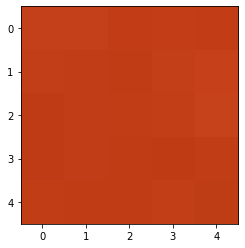

Central moments:
M00: 18.968627450980392
M10: 38.0078431372549
M01: 37.780392156862746
M11: 75.67843137254901
M20: 114.14901960784314
M02: 113.1921568627451
Fragment:  0 850 Variance:  6.166243752402927e-05 4.616070742022299e-05 5.2312187620146094e-05
Cx:  2.0037213148645856
Cy:  1.9917304114120322


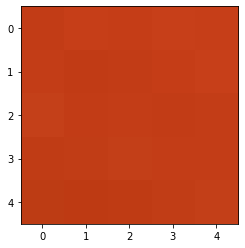

Central moments:
M00: 19.08235294117647
M10: 38.32941176470588
M01: 37.91372549019607
M11: 76.18823529411765
M20: 115.17647058823528
M02: 113.45882352941176
Fragment:  0 855 Variance:  9.704575163398697e-05 3.075740099961555e-05 3.690888119953864e-05
Cx:  2.008631319358816
Cy:  1.986847513357994


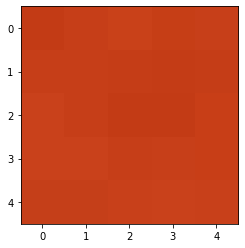

Central moments:
M00: 19.45098039215686
M10: 38.92156862745098
M01: 38.984313725490196
M11: 78.02352941176471
M20: 116.83529411764707
M02: 117.07058823529411
Fragment:  0 860 Variance:  5.782391387927715e-05 5.290272971933861e-05 5.373933102652825e-05
Cx:  2.001008064516129
Cy:  2.004233870967742


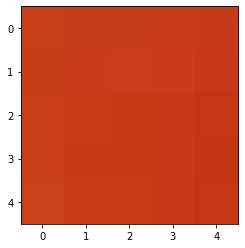

Central moments:
M00: 19.427450980392155
M10: 38.70980392156863
M01: 38.8235294117647
M11: 77.23529411764706
M20: 115.90980392156862
M02: 116.46274509803922
Fragment:  0 865 Variance:  3.774548250672828e-05 9.753787004998075e-05 6.185928489042675e-05
Cx:  1.9925312878482038
Cy:  1.9983851433185305


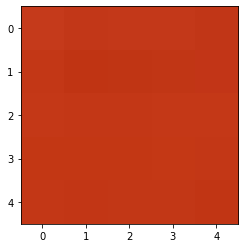

Central moments:
M00: 19.07450980392157
M10: 38.10980392156863
M01: 38.15686274509804
M11: 76.26666666666667
M20: 114.33725490196076
M02: 114.43921568627451
Fragment:  0 870 Variance:  2.347404844290669e-05 2.3769319492502867e-05 5.1574009996155316e-05
Cx:  1.9979440789473684
Cy:  2.000411184210526


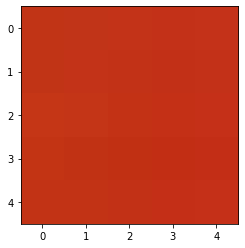

Central moments:
M00: 19.094117647058823
M10: 38.266666666666666
M01: 38.2078431372549
M11: 76.56470588235294
M20: 114.94117647058826
M02: 114.60784313725489
Fragment:  0 875 Variance:  2.4950403690888355e-05 6.643598615916957e-05 3.7991541714725096e-05
Cx:  2.004107619634422
Cy:  2.0010269049086054


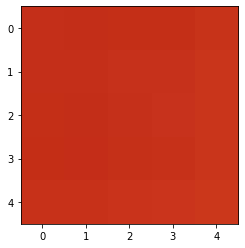

Central moments:
M00: 19.415686274509802
M10: 39.05098039215686
M01: 39.0
M11: 78.47058823529412
M20: 117.46666666666668
M02: 117.24313725490195
Fragment:  0 880 Variance:  8.179008073817725e-05 0.00010516570549788544 4.2715878508266045e-05
Cx:  2.011310846293678
Cy:  2.00868511411836


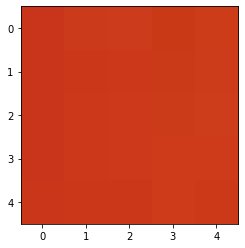

Central moments:
M00: 19.941176470588236
M10: 40.01960784313725
M01: 39.95294117647059
M11: 80.23137254901961
M20: 120.12156862745098
M02: 119.89019607843137
Fragment:  0 885 Variance:  3.936947327950818e-05 8.769550173010377e-05 2.4999615532487504e-05
Cx:  2.006882989183874
Cy:  2.0035398230088495


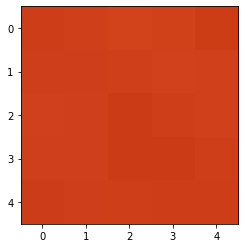

Central moments:
M00: 20.211764705882352
M10: 40.423529411764704
M01: 40.32156862745098
M11: 80.6078431372549
M20: 121.27058823529414
M02: 120.83921568627451
Fragment:  0 890 Variance:  5.1278738946558985e-05 5.723337178008453e-05 7.14555940023068e-05
Cx:  2.0
Cy:  1.994955374466434


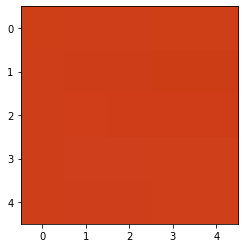

Central moments:
M00: 20.215686274509803
M10: 40.43529411764706
M01: 40.48627450980392
M11: 81.03137254901961
M20: 121.29803921568629
M02: 121.49803921568628
Fragment:  0 895 Variance:  1.3533256439830737e-05 9.743944636678204e-06 4.798154555940023e-05
Cx:  2.0001939864209506
Cy:  2.0027158098933073


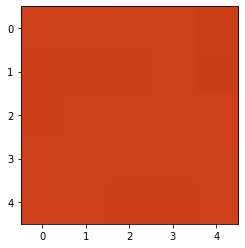

Central moments:
M00: 20.149019607843137
M10: 40.24313725490196
M01: 40.32156862745098
M11: 80.51764705882353
M20: 120.66666666666666
M02: 120.95686274509804
Fragment:  0 900 Variance:  1.4911188004613593e-05 9.448673587081893e-06 9.448673587081893e-06
Cx:  1.997275204359673
Cy:  2.00116776956014


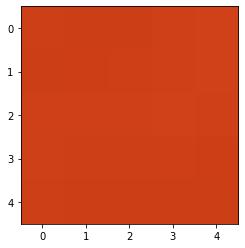

Central moments:
M00: 20.16470588235294
M10: 40.396078431372544
M01: 40.26274509803922
M11: 80.52941176470588
M20: 121.29019607843138
M02: 120.6
Fragment:  0 905 Variance:  3.0412918108419625e-05 1.683044982698959e-05 1.6830449826989618e-05
Cx:  2.0033061065733175
Cy:  1.9966938934266825


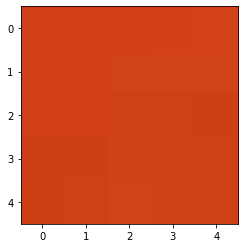

Central moments:
M00: 20.376470588235293
M10: 40.71764705882353
M01: 40.549019607843135
M11: 81.04313725490195
M20: 122.09019607843138
M02: 121.49803921568628
Fragment:  0 910 Variance:  5.61999231064971e-05 2.1997693194925085e-05 4.217454825067282e-05
Cx:  1.998267898383372
Cy:  1.9899923017705927


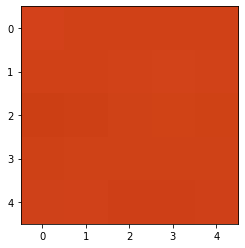

Central moments:
M00: 20.337254901960783
M10: 40.70196078431372
M01: 40.56470588235294
M11: 81.2078431372549
M20: 122.12941176470588
M02: 121.6392156862745
Fragment:  0 915 Variance:  3.20861207227987e-05 1.8060745866974293e-05 2.6229911572472128e-05
Cx:  2.001349787890474
Cy:  1.9946008484381026


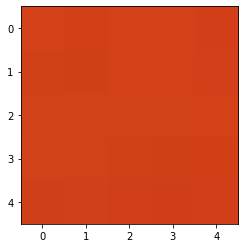

Central moments:
M00: 20.517647058823528
M10: 41.07058823529412
M01: 40.917647058823526
M11: 81.91372549019607
M20: 123.26666666666667
M02: 122.65882352941176
Fragment:  0 920 Variance:  2.893656286043818e-05 2.5688581314878936e-05 1.1417147251057286e-05
Cx:  2.001720183486239
Cy:  1.9942660550458715


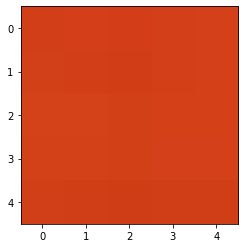

Central moments:
M00: 20.635294117647057
M10: 41.30588235294118
M01: 41.16078431372549
M11: 82.34509803921569
M20: 124.01176470588236
M02: 123.24705882352941
Fragment:  0 925 Variance:  3.5826220684352396e-05 3.139715494040754e-05 1.8798923490965013e-05
Cx:  2.001710376282783
Cy:  1.9946788293424558


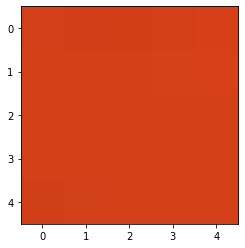

Central moments:
M00: 20.752941176470586
M10: 41.576470588235296
M01: 41.48627450980393
M11: 83.11764705882354
M20: 124.8313725490196
M02: 124.34117647058824
Fragment:  0 930 Variance:  1.6879661668589225e-05 7.726259131103397e-06 6.151480199923106e-06
Cx:  2.003401360544218
Cy:  1.9990551776266068


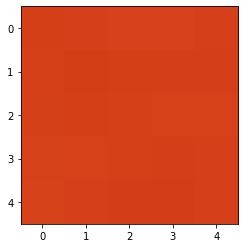

Central moments:
M00: 20.862745098039216
M10: 41.73725490196078
M01: 41.69803921568628
M11: 83.3529411764706
M20: 125.23529411764706
M02: 125.08627450980391
Fragment:  0 935 Variance:  1.8454440599769376e-05 2.716493656286038e-05 3.115109573241061e-05
Cx:  2.000563909774436
Cy:  1.998684210526316


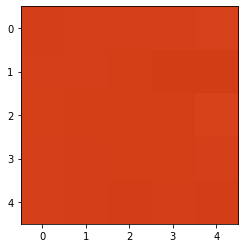

Central moments:
M00: 20.760784313725487
M10: 41.450980392156865
M01: 41.49803921568627
M11: 82.84313725490196
M20: 124.36078431372549
M02: 124.47843137254901
Fragment:  0 940 Variance:  2.372010765090377e-05 2.0275278738946554e-05 4.0747404844290654e-05
Cx:  1.9965999244427657
Cy:  1.9988666414809217


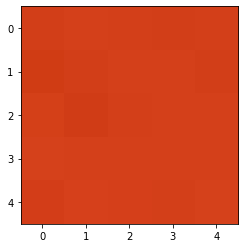

Central moments:
M00: 20.721568627450978
M10: 41.47843137254902
M01: 41.54117647058824
M11: 83.12941176470588
M20: 124.44313725490196
M02: 124.75686274509803
Fragment:  0 945 Variance:  3.0609765474817645e-05 2.7460207612456714e-05 3.804075355632449e-05
Cx:  2.0017032551097653
Cy:  2.004731264193793


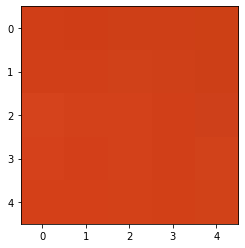

Central moments:
M00: 20.498039215686273
M10: 40.79607843137255
M01: 41.22745098039215
M11: 82.0470588235294
M20: 122.16078431372549
M02: 123.83921568627449
Fragment:  0 950 Variance:  8.602229911572458e-05 2.706651287966164e-05 3.79915417147251e-05
Cx:  1.9902429691983932
Cy:  2.011287545437153


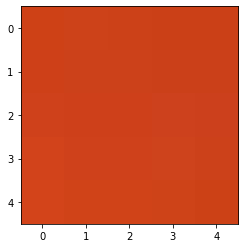

Central moments:
M00: 20.15686274509804
M10: 40.11372549019608
M01: 40.49411764705882
M11: 80.50196078431372
M20: 120.16078431372549
M02: 121.68627450980392
Fragment:  0 955 Variance:  6.766628219915406e-05 2.2489811610918935e-05 5.152479815455593e-05
Cx:  1.9900778210116734
Cy:  2.0089494163424124


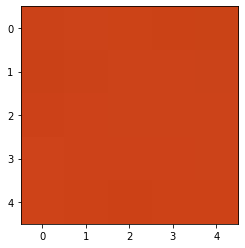

Central moments:
M00: 20.011764705882353
M10: 39.99607843137255
M01: 40.12941176470588
M11: 80.1843137254902
M20: 119.93333333333334
M02: 120.49019607843137
Fragment:  0 960 Variance:  1.6387543252595345e-05 7.234140715109594e-06 2.007843137254902e-05
Cx:  1.9986282578875174
Cy:  2.005291005291005


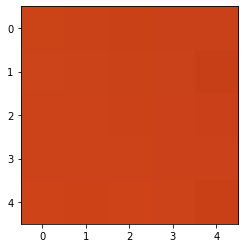

Central moments:
M00: 19.898039215686275
M10: 39.65882352941176
M01: 39.937254901960785
M11: 79.5843137254902
M20: 118.80392156862743
M02: 119.95294117647059
Fragment:  0 965 Variance:  3.996001537870076e-05 2.4605920799692475e-05 1.8552864282968088e-05
Cx:  1.9931020890815923
Cy:  2.0070949940875047


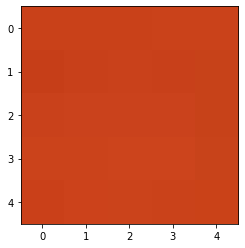

Central moments:
M00: 19.756862745098037
M10: 39.490196078431374
M01: 39.62352941176471
M11: 79.13333333333334
M20: 118.33725490196079
M02: 119.04313725490195
Fragment:  0 970 Variance:  3.7056516724336786e-05 2.647597078046911e-05 2.3720107650903494e-05
Cx:  1.9988090512107983
Cy:  2.0055577610162767


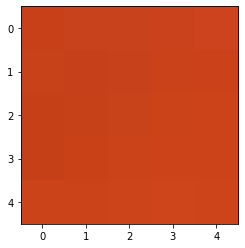

Central moments:
M00: 19.764705882352942
M10: 39.7921568627451
M01: 39.67058823529412
M11: 79.84705882352941
M20: 119.65882352941176
M02: 119.31764705882352
Fragment:  0 975 Variance:  0.00010334486735870818 2.7903114186851242e-05 4.291272587466359e-05
Cx:  2.013293650793651
Cy:  2.007142857142857


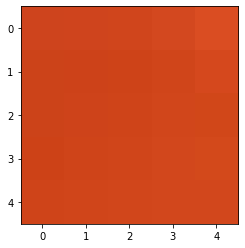

Central moments:
M00: 20.415686274509802
M10: 41.16470588235294
M01: 40.803921568627445
M11: 82.09411764705882
M20: 123.89411764705883
M02: 122.54509803921567
Fragment:  0 980 Variance:  0.00013690734332948818 9.335486351403296e-05 8.449673202614377e-05
Cx:  2.0163273146369574
Cy:  1.9986553976181327


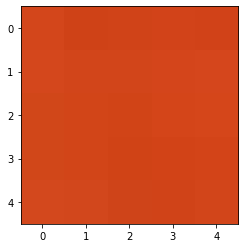

Central moments:
M00: 20.584313725490194
M10: 41.219607843137254
M01: 41.141176470588235
M11: 82.36078431372549
M20: 123.83921568627451
M02: 123.28235294117647
Fragment:  0 985 Variance:  4.119031141868525e-05 4.1830065359477105e-05 4.9556324490580555e-05
Cx:  2.0024766622213757
Cy:  1.9986664126500286


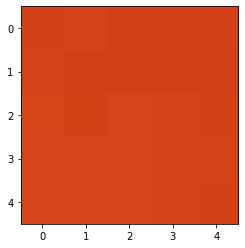

Central moments:
M00: 20.713725490196076
M10: 41.294117647058826
M01: 41.65882352941176
M11: 83.10196078431372
M20: 123.72549019607843
M02: 125.19607843137256
Fragment:  0 990 Variance:  9.414225297962348e-05 4.75878508266051e-05 3.774548250672818e-05
Cx:  1.9935630443014014
Cy:  2.011170011359334


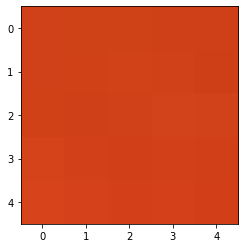

Central moments:
M00: 20.505882352941175
M10: 40.93333333333334
M01: 41.25490196078431
M11: 82.26666666666665
M20: 122.74509803921569
M02: 124.08627450980393
Fragment:  0 995 Variance:  7.342406766628224e-05 2.7706266820453704e-05 2.426143790849673e-05
Cx:  1.996175176898069
Cy:  2.0118569516159877


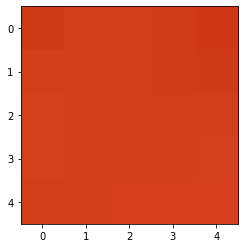

Central moments:
M00: 20.509803921568626
M10: 41.0313725490196
M01: 41.188235294117646
M11: 82.47843137254901
M20: 123.05490196078432
M02: 123.73725490196078
Fragment:  0 1000 Variance:  4.552095347943095e-05 4.886735870818914e-05 2.8444444444444447e-05
Cx:  2.00057361376673
Cy:  2.0082217973231358


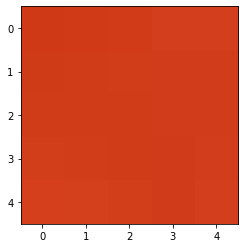

Central moments:
M00: 20.505882352941175
M10: 41.05098039215686
M01: 41.086274509803914
M11: 82.078431372549
M20: 123.2392156862745
M02: 123.4470588235294
Fragment:  0 1005 Variance:  3.4054594386774306e-05 3.700730488273738e-05 6.27450980392157e-05
Cx:  2.0019124115509657
Cy:  2.003633581946835


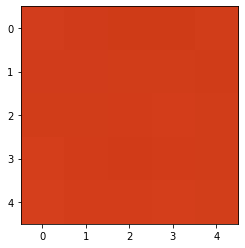

Central moments:
M00: 20.549019607843135
M10: 41.04313725490195
M01: 41.247058823529414
M11: 82.35294117647058
M20: 123.10588235294118
M02: 123.91372549019607
Fragment:  0 1010 Variance:  3.198769703960021e-05 1.5846212995001923e-05 2.59838523644752e-05
Cx:  1.9973282442748088
Cy:  2.0072519083969467


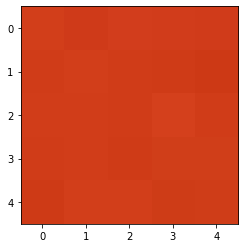

Central moments:
M00: 20.419607843137253
M10: 40.78823529411764
M01: 40.8078431372549
M11: 81.54509803921567
M20: 122.23921568627452
M02: 122.37647058823529
Fragment:  0 1015 Variance:  3.6318339100345894e-05 3.700730488273738e-05 4.217454825067282e-05
Cx:  1.99750336086038
Cy:  1.998463606683311


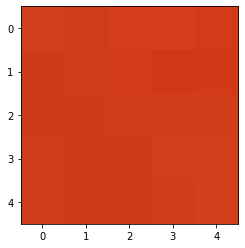

Central moments:
M00: 20.419607843137253
M10: 40.94117647058823
M01: 40.76078431372549
M11: 81.80784313725489
M20: 122.96470588235294
M02: 122.27450980392156
Fragment:  0 1020 Variance:  4.4930411380238175e-05 4.306036139946174e-05 4.119031141868512e-05
Cx:  2.0049932782792395
Cy:  1.9961590167082772


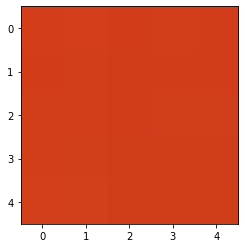

Central moments:
M00: 20.509803921568626
M10: 40.92156862745098
M01: 40.94117647058823
M11: 81.66274509803921
M20: 122.72549019607845
M02: 122.79215686274509
Fragment:  0 1025 Variance:  2.3375624759707736e-05 2.2145328719723173e-05 2.470434448289119e-05
Cx:  1.995219885277247
Cy:  1.9961759082217974


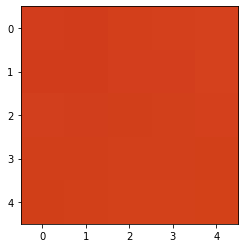

Central moments:
M00: 20.619607843137253
M10: 41.364705882352936
M01: 41.19607843137254
M11: 82.58431372549019
M20: 124.25098039215686
M02: 123.59607843137253
Fragment:  0 1030 Variance:  2.303114186851225e-05 3.730257593233366e-05 3.380853517877739e-05
Cx:  2.00608596424496
Cy:  1.9979079497907948


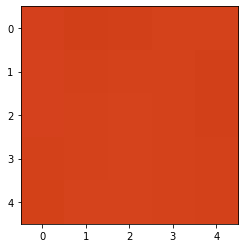

Central moments:
M00: 20.75294117647059
M10: 41.470588235294116
M01: 41.54901960784314
M11: 83.01568627450979
M20: 124.33333333333334
M02: 124.66274509803922
Fragment:  0 1035 Variance:  1.8109957708573882e-05 1.732256824298354e-05 2.7706266820453666e-05
Cx:  1.998299319727891
Cy:  2.0020786092214666


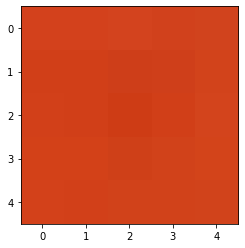

Central moments:
M00: 20.52549019607843
M10: 41.007843137254895
M01: 41.05882352941176
M11: 82.03137254901961
M20: 123.10980392156861
M02: 123.2549019607843
Fragment:  0 1040 Variance:  3.5530949634755604e-05 5.743021914648214e-05 6.0284505959246445e-05
Cx:  1.9978983568972104
Cy:  2.00038211692778


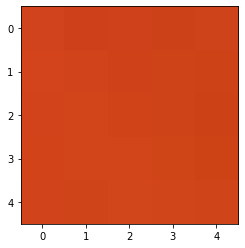

Central moments:
M00: 20.352941176470587
M10: 40.49019607843137
M01: 40.78431372549019
M11: 81.1843137254902
M20: 121.24313725490195
M02: 122.38431372549019
Fragment:  0 1045 Variance:  6.151480199923062e-05 3.528489042675895e-05 5.2558246828143015e-05
Cx:  1.9894026974951828
Cy:  2.003853564547206


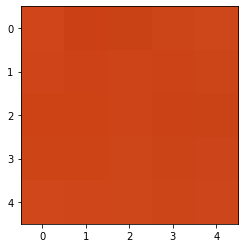

Central moments:
M00: 20.07450980392157
M10: 40.02745098039216
M01: 40.2
M11: 80.12156862745098
M20: 120.04313725490198
M02: 120.71764705882353
Fragment:  0 1050 Variance:  4.217454825067293e-05 4.389696270665126e-05 5.78239138792772e-05
Cx:  1.9939441297128346
Cy:  2.002539558507521


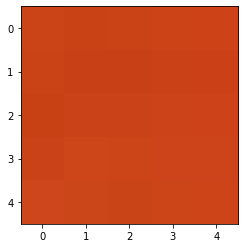

Central moments:
M00: 19.901960784313726
M10: 39.91372549019608
M01: 39.89019607843137
M11: 79.9450980392157
M20: 119.9450980392157
M02: 119.81176470588235
Fragment:  0 1055 Variance:  4.798154555940055e-05 4.98023836985775e-05 4.4143021914648204e-05
Cx:  2.0055172413793105
Cy:  2.004334975369458


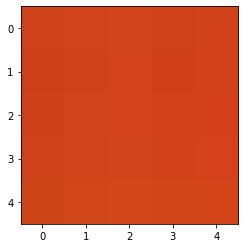

Central moments:
M00: 20.427450980392155
M10: 41.062745098039215
M01: 40.94509803921568
M11: 82.38039215686274
M20: 123.21960784313725
M02: 122.96862745098038
Fragment:  0 1060 Variance:  8.474279123414054e-05 4.7981545559400275e-05 2.819838523644752e-05
Cx:  2.0101746976387025
Cy:  2.004415434824342


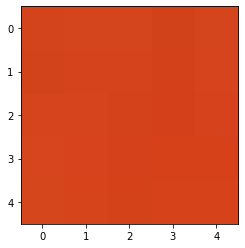

Central moments:
M00: 20.866666666666664
M10: 41.741176470588236
M01: 41.858823529411765
M11: 83.72156862745098
M20: 125.27058823529413
M02: 125.63137254901962
Fragment:  0 1065 Variance:  3.4054594386774435e-05 3.749942329873123e-05 3.331641676278354e-05
Cx:  2.0003758691975198
Cy:  2.0060139071603085


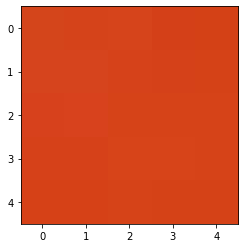

Central moments:
M00: 20.95686274509804
M10: 41.874509803921576
M01: 41.96862745098039
M11: 83.85882352941177
M20: 125.54509803921569
M02: 125.86666666666667
Fragment:  0 1070 Variance:  1.3877739331026428e-05 2.5836216839677078e-05 6.264667435601692e-05
Cx:  1.9981287425149703
Cy:  2.002619760479042


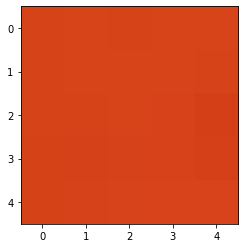

Central moments:
M00: 21.011764705882353
M10: 42.05882352941176
M01: 42.01176470588236
M11: 84.14901960784314
M20: 126.14509803921571
M02: 126.07450980392157
Fragment:  0 1075 Variance:  1.4419069588619659e-05 2.4261437908496703e-05 2.130872741253364e-05
Cx:  2.001679731243001
Cy:  1.9994400895856665


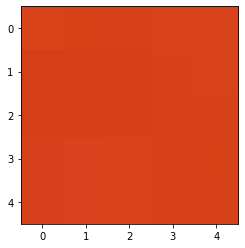

Central moments:
M00: 21.04705882352941
M10: 42.1764705882353
M01: 42.17254901960784
M11: 84.45490196078431
M20: 126.61568627450981
M02: 126.74509803921569
Fragment:  0 1080 Variance:  4.2715878508265754e-05 2.893656286043834e-05 5.659361783929258e-05
Cx:  2.0039128004471776
Cy:  2.003726476616359


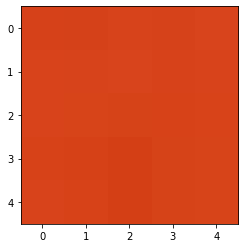

Central moments:
M00: 21.050980392156863
M10: 42.10980392156863
M01: 42.070588235294125
M11: 84.09411764705882
M20: 126.44705882352943
M02: 126.13333333333334
Fragment:  0 1085 Variance:  2.0324490580545802e-05 2.8395232602845054e-05 5.250903498654364e-05
Cx:  2.0003725782414308
Cy:  1.9985096870342776


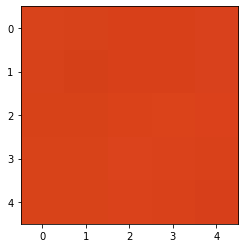

Central moments:
M00: 21.219607843137254
M10: 42.537254901960786
M01: 42.490196078431374
M11: 85.13333333333333
M20: 127.67450980392155
M02: 127.47843137254901
Fragment:  0 1090 Variance:  3.20861207227987e-05 2.2243752402922027e-05 2.214532871972318e-05
Cx:  2.0046202180742934
Cy:  2.0024025133986325


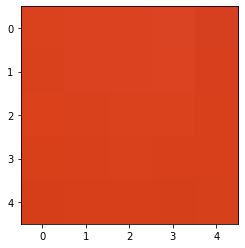

Central moments:
M00: 21.250980392156862
M10: 42.435294117647054
M01: 42.32941176470588
M11: 84.5843137254902
M20: 127.13333333333333
M02: 126.69803921568628
Fragment:  0 1095 Variance:  5.447750865051875e-05 3.110188389081128e-05 0.00010792156862745102
Cx:  1.9968628898320722
Cy:  1.9918804207418344


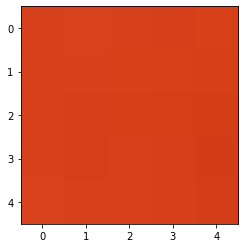

Central moments:
M00: 21.058823529411764
M10: 41.97254901960784
M01: 42.06666666666667
M11: 83.72941176470587
M20: 125.69019607843137
M02: 126.15294117647059
Fragment:  0 1100 Variance:  5.659361783929262e-05 3.5826220684352166e-05 8.060899653979239e-05
Cx:  1.9931098696461824
Cy:  1.9975791433891994


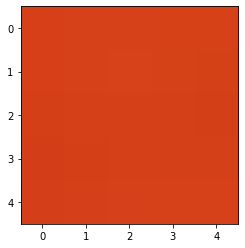

Central moments:
M00: 20.894117647058824
M10: 41.7686274509804
M01: 41.721568627450985
M11: 83.49411764705883
M20: 125.23529411764706
M02: 125.19607843137256
Fragment:  0 1105 Variance:  2.130872741253364e-05 2.150557477893114e-05 1.9684736639753943e-05
Cx:  1.9990615615615617
Cy:  1.9968093093093096


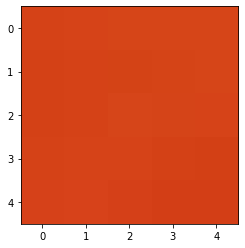

Central moments:
M00: 20.890196078431373
M10: 41.75686274509804
M01: 41.741176470588236
M11: 83.30196078431372
M20: 125.20784313725493
M02: 125.2078431372549
Fragment:  0 1110 Variance:  1.8356016916570638e-05 6.117031910803534e-05 2.0767397154940404e-05
Cx:  1.998873662474188
Cy:  1.9981227707903135


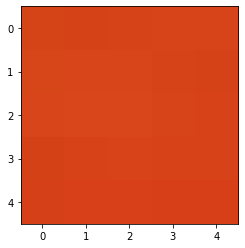

Central moments:
M00: 21.066666666666666
M10: 42.15294117647059
M01: 42.168627450980395
M11: 84.4
M20: 126.38039215686275
M02: 126.47450980392158
Fragment:  0 1115 Variance:  2.4999615532487325e-05 6.801076509034986e-05 2.2243752402921952e-05
Cx:  2.0009307520476547
Cy:  2.001675353685778


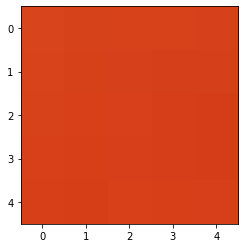

Central moments:
M00: 21.04313725490196
M10: 42.00000000000001
M01: 42.10588235294118
M11: 84.07058823529411
M20: 125.89803921568628
M02: 126.36470588235295
Fragment:  0 1120 Variance:  1.5846212995001807e-05 4.837524029219534e-05 2.2292964244521335e-05
Cx:  1.9959001118151327
Cy:  2.0009317927692885


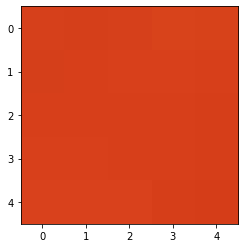

Central moments:
M00: 21.07843137254902
M10: 42.12549019607844
M01: 42.207843137254905
M11: 84.18823529411765
M20: 126.29019607843136
M02: 126.67843137254903
Fragment:  0 1125 Variance:  2.0915032679738414e-05 2.59346405228758e-05 1.441906958861976e-05
Cx:  1.998511627906977
Cy:  2.002418604651163


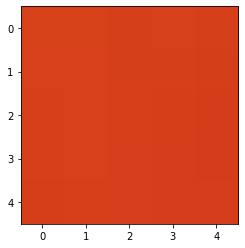

Central moments:
M00: 21.00392156862745
M10: 41.90588235294118
M01: 42.050980392156866
M11: 83.92549019607844
M20: 125.57647058823531
M02: 126.1607843137255
Fragment:  0 1130 Variance:  1.879892349096488e-05 2.7952326028450564e-05 1.1712418300653593e-05
Cx:  1.9951456310679612
Cy:  2.0020537714712474


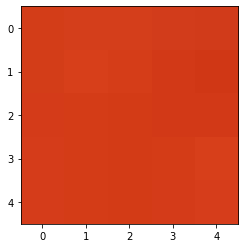

Central moments:
M00: 20.749019607843135
M10: 41.431372549019606
M01: 41.5843137254902
M11: 83.15686274509804
M20: 124.2235294117647
M02: 124.84705882352942
Fragment:  0 1135 Variance:  4.1682429834679235e-05 5.3247212610534376e-05 5.13279507881584e-05
Cx:  1.996786996786997
Cy:  2.0041580041580045


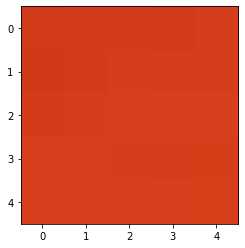

Central moments:
M00: 20.85882352941176
M10: 41.7843137254902
M01: 41.95294117647059
M11: 83.89411764705883
M20: 125.4
M02: 125.96862745098039
Fragment:  0 1140 Variance:  9.015609381007315e-05 4.045213379469433e-05 3.060976547481738e-05
Cx:  2.003196089490506
Cy:  2.011280315848844


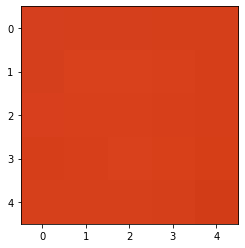

Central moments:
M00: 21.019607843137255
M10: 41.992156862745105
M01: 42.03529411764706
M11: 83.90588235294118
M20: 125.80392156862746
M02: 125.91764705882353
Fragment:  0 1145 Variance:  4.1830065359476983e-05 1.879892349096498e-05 4.1830065359477126e-05
Cx:  1.9977611940298512
Cy:  1.999813432835821


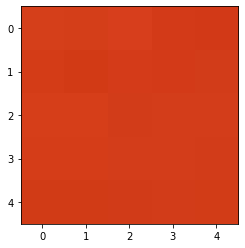

Central moments:
M00: 20.709803921568625
M10: 41.32549019607842
M01: 41.32156862745097
M11: 82.51372549019607
M20: 123.87450980392157
M02: 123.79999999999998
Fragment:  0 1150 Variance:  4.0944252210688504e-05 3.405459438677431e-05 3.5826220684352166e-05
Cx:  1.995455406173073
Cy:  1.995266048096951


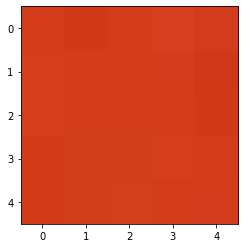

Central moments:
M00: 20.619607843137253
M10: 41.21176470588235
M01: 41.2078431372549
M11: 82.42745098039215
M20: 123.57254901960783
M02: 123.6
Fragment:  0 1155 Variance:  3.4103806228373825e-05 4.074740484429065e-05 5.2902729719338716e-05
Cx:  1.9986686953214152
Cy:  1.99847850893876


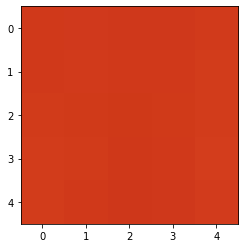

Central moments:
M00: 20.431372549019606
M10: 40.88627450980391
M01: 40.88627450980392
M11: 81.79607843137254
M20: 122.83921568627451
M02: 122.63529411764705
Fragment:  0 1160 Variance:  2.3375624759707638e-05 3.6908881199538624e-05 1.4763552479815456e-05
Cx:  2.0011516314779265
Cy:  2.001151631477927


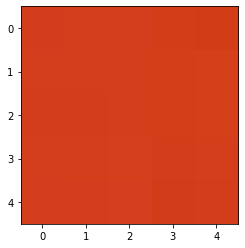

Central moments:
M00: 20.713725490196076
M10: 41.4156862745098
M01: 41.46274509803921
M11: 82.88627450980393
M20: 124.25490196078432
M02: 124.41960784313724
Fragment:  0 1165 Variance:  8.021530180699934e-06 2.2145328719723187e-05 5.989081122645137e-05
Cx:  1.999432033320712
Cy:  2.0017039000378642


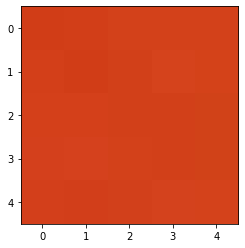

Central moments:
M00: 20.666666666666664
M10: 41.32549019607843
M01: 41.35686274509804
M11: 82.6313725490196
M20: 123.9764705882353
M02: 124.08627450980393
Fragment:  0 1170 Variance:  2.2145328719723427e-05 3.7253364090734365e-05 3.936947327950788e-05
Cx:  1.9996204933586337
Cy:  2.001138519924099


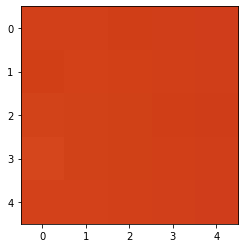

Central moments:
M00: 20.505882352941175
M10: 40.87450980392156
M01: 41.05098039215686
M11: 81.78823529411764
M20: 122.49803921568626
M02: 123.2235294117647
Fragment:  0 1175 Variance:  2.7903114186851144e-05 6.643598615916957e-05 3.1840061514801994e-05
Cx:  1.9933065595716197
Cy:  2.0019124115509657


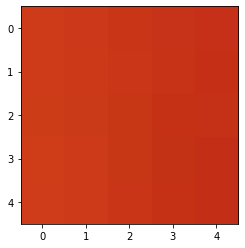

Central moments:
M00: 19.69019607843137
M10: 38.87450980392157
M01: 39.32941176470588
M11: 77.51764705882353
M20: 116.16862745098038
M02: 118.01176470588234
Fragment:  0 1180 Variance:  0.00023336255286428333 0.000341677816224529 3.902499038831219e-05
Cx:  1.9743079067914762
Cy:  1.9974108743278234


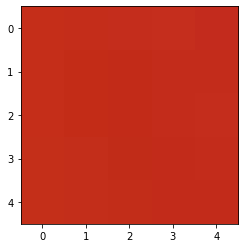

Central moments:
M00: 19.137254901960784
M10: 38.2078431372549
M01: 38.199999999999996
M11: 76.25490196078431
M20: 114.6470588235294
M02: 114.54509803921567
Fragment:  0 1185 Variance:  1.845444059976958e-05 2.5688581314878875e-05 4.0206074586697415e-05
Cx:  1.9965163934426229
Cy:  1.9961065573770491


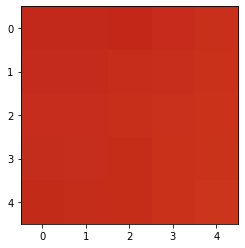

Central moments:
M00: 19.423529411764704
M10: 39.15294117647059
M01: 38.92549019607843
M11: 78.51372549019608
M20: 117.82745098039214
M02: 116.72941176470587
Fragment:  0 1190 Variance:  0.00010373856209150308 0.00016732026143790845 4.143637062668204e-05
Cx:  2.0157480314960634
Cy:  2.004037956793862


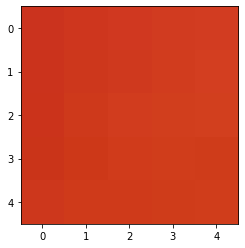

Central moments:
M00: 20.28235294117647
M10: 40.85098039215686
M01: 40.529411764705884
M11: 81.51764705882353
M20: 122.74117647058824
M02: 121.55686274509803
Fragment:  0 1195 Variance:  8.651441753171853e-05 0.00019576470588235289 8.612072279892349e-05
Cx:  2.014114462490333
Cy:  1.9982598607888633


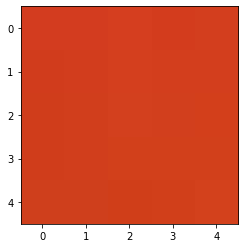

Central moments:
M00: 20.580392156862743
M10: 41.26666666666666
M01: 41.01960784313725
M11: 82.32941176470587
M20: 123.86274509803921
M02: 122.91764705882352
Fragment:  0 1200 Variance:  3.434986543637056e-05 2.9871587850826596e-05 3.676124567474048e-05
Cx:  2.0051448170731705
Cy:  1.993140243902439


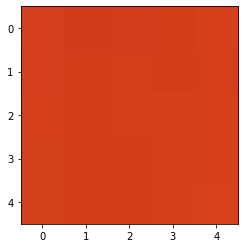

Central moments:
M00: 20.65490196078431
M10: 41.3921568627451
M01: 41.33725490196079
M11: 82.90588235294118
M20: 124.35686274509804
M02: 123.99607843137257
Fragment:  0 1205 Variance:  2.3031141868512354e-05 3.041291810841981e-05 4.148558246828143e-05
Cx:  2.00398708942472
Cy:  2.0013290298082405


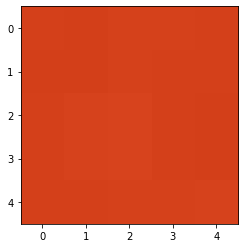

Central moments:
M00: 20.83137254901961
M10: 41.67058823529412
M01: 41.70588235294118
M11: 83.4235294117647
M20: 124.92549019607844
M02: 125.15686274509804
Fragment:  0 1210 Variance:  2.1062668204536823e-05 2.1062668204536735e-05 2.106266820453671e-05
Cx:  2.0003765060240966
Cy:  2.00207078313253


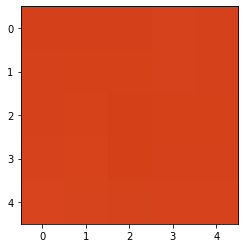

Central moments:
M00: 20.909803921568628
M10: 41.80392156862745
M01: 41.886274509803926
M11: 83.65882352941176
M20: 125.42745098039217
M02: 125.74509803921569
Fragment:  0 1215 Variance:  1.4173010380622737e-05 1.978316032295277e-05 3.3857747020376775e-05
Cx:  1.9992498124531133
Cy:  2.003188297074269


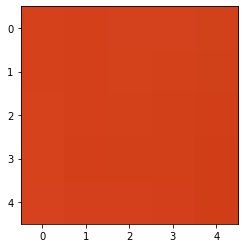

Central moments:
M00: 20.705882352941174
M10: 41.188235294117646
M01: 41.3921568627451
M11: 82.29019607843136
M20: 123.31372549019608
M02: 124.19215686274508
Fragment:  0 1220 Variance:  4.921184159938513e-05 2.3523260284506023e-05 4.783391003460207e-05
Cx:  1.9892045454545457
Cy:  1.9990530303030305


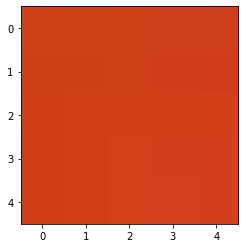

Central moments:
M00: 20.44705882352941
M10: 41.00392156862745
M01: 41.05098039215686
M11: 82.41176470588235
M20: 123.05098039215684
M02: 123.30196078431374
Fragment:  0 1225 Variance:  4.315878508266033e-05 1.786389850057665e-05 3.725336409073433e-05
Cx:  2.0053701572688913
Cy:  2.0076716532412733


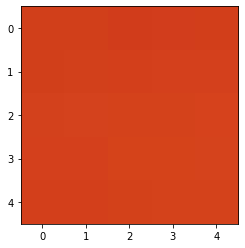

Central moments:
M00: 20.713725490196076
M10: 41.517647058823535
M01: 41.54117647058824
M11: 83.24313725490197
M20: 124.64705882352943
M02: 124.61568627450981
Fragment:  0 1230 Variance:  2.8936562860438588e-05 5.255824682814309e-05 1.1466359092656672e-05
Cx:  2.0043544112078764
Cy:  2.0054903445664527


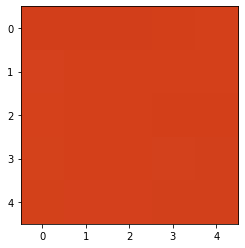

Central moments:
M00: 20.72549019607843
M10: 41.4078431372549
M01: 41.45098039215686
M11: 82.73333333333332
M20: 124.1764705882353
M02: 124.27450980392155
Fragment:  0 1235 Variance:  1.3533256439831102e-05 1.39269511726259e-05 1.4861976163014225e-05
Cx:  1.9979186376537372
Cy:  2.0


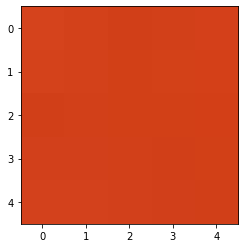

Central moments:
M00: 20.627450980392155
M10: 41.2313725490196
M01: 41.188235294117646
M11: 82.30196078431372
M20: 123.74117647058823
M02: 123.51764705882351
Fragment:  0 1240 Variance:  1.7224144559784834e-05 1.4369857747020355e-05 4.429065743944637e-05
Cx:  1.9988593155893537
Cy:  1.9967680608365022


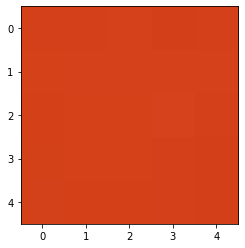

Central moments:
M00: 20.81176470588235
M10: 41.61960784313726
M01: 41.58823529411765
M11: 83.17254901960784
M20: 124.78823529411764
M02: 124.66274509803922
Fragment:  0 1245 Variance:  1.0482122260669124e-05 8.710495963091083e-06 1.8306805074971163e-05
Cx:  1.999811569625024
Cy:  1.9983041266252124


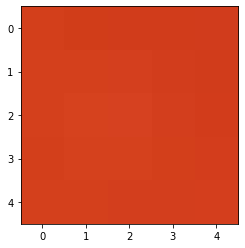

Central moments:
M00: 20.705882352941174
M10: 41.325490196078434
M01: 41.51372549019607
M11: 82.90196078431373
M20: 123.84313725490196
M02: 124.54117647058823
Fragment:  0 1250 Variance:  3.3217993079585054e-05 5.054056132256822e-05 2.790311418685121e-05
Cx:  1.9958333333333338
Cy:  2.0049242424242424


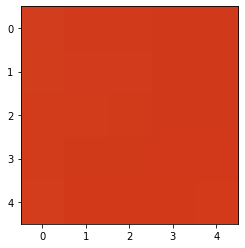

Central moments:
M00: 20.52156862745098
M10: 40.984313725490196
M01: 41.10588235294117
M11: 82.16470588235293
M20: 122.92941176470588
M02: 123.41960784313724
Fragment:  0 1255 Variance:  1.564936562860427e-05 3.139715494040752e-05 1.8552864282968088e-05
Cx:  1.9971335753869675
Cy:  2.0030575195872347


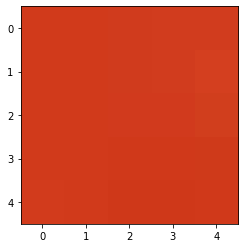

Central moments:
M00: 20.462745098039214
M10: 40.90588235294118
M01: 40.87843137254902
M11: 81.62745098039215
M20: 122.75686274509802
M02: 122.55686274509803
Fragment:  0 1260 Variance:  1.5403306420607463e-05 3.823760092272204e-05 4.045213379469435e-05
Cx:  1.9990417784591799
Cy:  1.9977002683020315


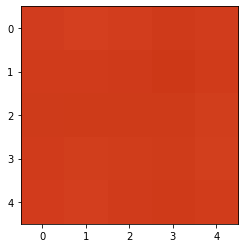

Central moments:
M00: 20.40392156862745
M10: 40.78431372549019
M01: 40.8156862745098
M11: 81.59607843137255
M20: 122.39215686274508
M02: 122.61176470588234
Fragment:  0 1265 Variance:  4.345405613225665e-05 4.217454825067282e-05 5.103267973856209e-05
Cx:  1.9988468191428022
Cy:  2.0003843936190657


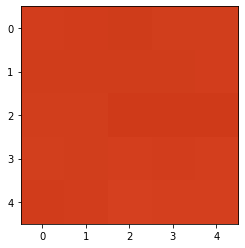

Central moments:
M00: 20.517647058823528
M10: 41.062745098039215
M01: 41.16470588235294
M11: 82.45882352941177
M20: 123.24313725490195
M02: 123.7372549019608
Fragment:  0 1270 Variance:  4.000922722029992e-05 3.528489042675896e-05 3.3857747020376775e-05
Cx:  2.0013379204892967
Cy:  2.0063073394495414


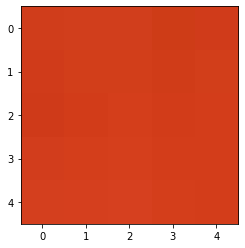

Central moments:
M00: 20.6078431372549
M10: 41.23529411764706
M01: 41.431372549019606
M11: 82.89803921568627
M20: 123.62745098039215
M02: 124.51372549019607
Fragment:  0 1275 Variance:  5.905420991926198e-05 2.98715878508266e-05 5.009765474817378e-05
Cx:  2.0009514747859183
Cy:  2.0104662226451


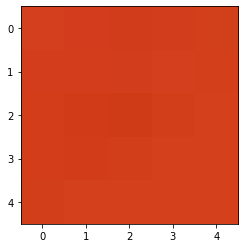

Central moments:
M00: 20.662745098039213
M10: 41.35294117647059
M01: 41.372549019607845
M11: 82.88235294117648
M20: 124.16078431372549
M02: 124.21176470588236
Fragment:  0 1280 Variance:  2.3720107650903718e-05 4.365090349865432e-05 4.059976931949249e-05
Cx:  2.001328525336876
Cy:  2.0022774720060736


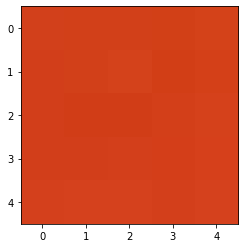

Central moments:
M00: 20.69411764705882
M10: 41.490196078431374
M01: 41.47843137254902
M11: 83.15294117647059
M20: 124.63529411764708
M02: 124.57647058823528
Fragment:  0 1285 Variance:  2.942868127643246e-05 3.090503652441368e-05 5.496962706651287e-05
Cx:  2.0049270418798564
Cy:  2.004358537047565


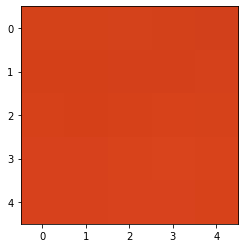

Central moments:
M00: 20.956862745098036
M10: 41.92941176470588
M01: 42.141176470588235
M11: 84.3686274509804
M20: 125.78039215686275
M02: 126.60392156862746
Fragment:  0 1290 Variance:  5.2016916570549654e-05 1.7076509034986614e-05 3.331641676278354e-05
Cx:  2.0007485029940124
Cy:  2.0108532934131738


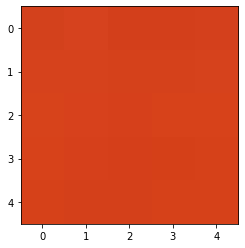

Central moments:
M00: 20.925490196078428
M10: 41.839215686274514
M01: 41.90980392156863
M11: 83.81176470588235
M20: 125.56470588235295
M02: 125.65098039215687
Fragment:  0 1295 Variance:  2.470434448289127e-05 1.7617839292579826e-05 2.6722029988465974e-05
Cx:  1.9994377811094457
Cy:  2.002811094452774


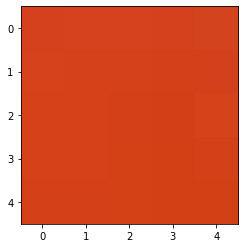

Central moments:
M00: 20.81176470588235
M10: 41.494117647058815
M01: 41.58039215686274
M11: 82.90588235294118
M20: 124.35686274509803
M02: 124.6549019607843
Fragment:  0 1300 Variance:  2.278508266051542e-05 1.5157247212610587e-05 0.00012558861976163014
Cx:  1.9937817976257772
Cy:  1.9979272658752594


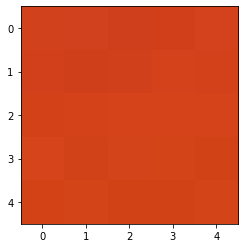

Central moments:
M00: 20.631372549019606
M10: 41.294117647058826
M01: 41.325490196078434
M11: 82.5921568627451
M20: 124.0078431372549
M02: 123.91372549019607
Fragment:  0 1305 Variance:  5.300115340253766e-05 3.774548250672818e-05 7.15048058439062e-05
Cx:  2.001520623455617
Cy:  2.0030412469112338


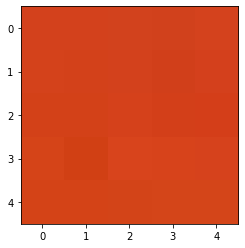

Central moments:
M00: 20.752941176470586
M10: 41.537254901960786
M01: 41.6
M11: 83.30196078431374
M20: 124.68235294117646
M02: 124.83921568627451
Fragment:  0 1310 Variance:  4.148558246828166e-05 4.9851595540176846e-05 7.563860053825451e-05
Cx:  2.0015117157974305
Cy:  2.0045351473922906


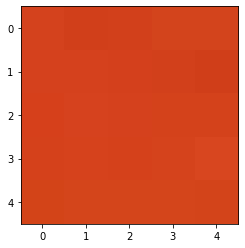

Central moments:
M00: 20.788235294117644
M10: 41.52156862745098
M01: 41.66666666666667
M11: 83.29411764705881
M20: 124.51764705882353
M02: 124.9607843137255
Fragment:  0 1315 Variance:  4.365090349865459e-05 6.510726643598616e-05 3.336562860438292e-05
Cx:  1.997358988870025
Cy:  2.004338803999246


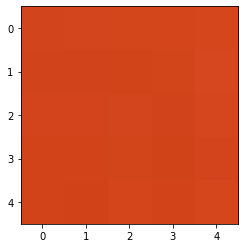

Central moments:
M00: 20.65098039215686
M10: 41.40784313725491
M01: 41.27058823529411
M11: 82.70980392156864
M20: 124.41960784313726
M02: 123.82745098039214
Fragment:  0 1320 Variance:  3.430065359477146e-05 2.5245674740484415e-05 4.857208765859284e-05
Cx:  2.005127231295101
Cy:  1.9984808203570072


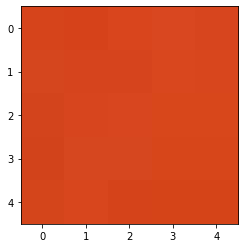

Central moments:
M00: 21.019607843137255
M10: 42.1764705882353
M01: 41.937254901960785
M11: 84.10980392156863
M20: 126.55294117647057
M02: 125.70196078431373
Fragment:  0 1325 Variance:  4.921184159938478e-05 3.19876970396002e-05 7.135717031910803e-05
Cx:  2.006529850746269
Cy:  1.9951492537313433


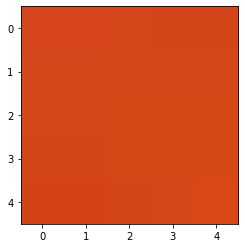

Central moments:
M00: 20.92156862745098
M10: 41.898039215686275
M01: 41.81960784313726
M11: 83.92941176470589
M20: 125.78039215686275
M02: 125.41960784313727
Fragment:  0 1330 Variance:  2.4605920799692336e-05 3.705651672433678e-05 3.7302575932333714e-05
Cx:  2.0026241799437674
Cy:  1.9988753514526714


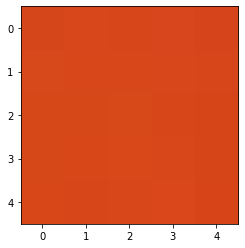

Central moments:
M00: 21.101960784313725
M10: 42.219607843137254
M01: 42.247058823529414
M11: 84.51764705882354
M20: 126.56470588235294
M02: 126.81960784313726
Fragment:  0 1335 Variance:  1.879892349096488e-05 2.5491733948481327e-05 2.721414840445982e-05
Cx:  2.0007433562534844
Cy:  2.0020442296970824


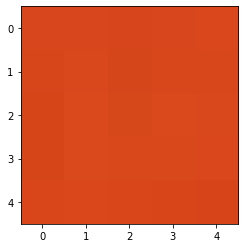

Central moments:
M00: 21.2
M10: 42.44705882352941
M01: 42.44313725490196
M11: 84.92549019607843
M20: 127.38039215686274
M02: 127.3921568627451
Fragment:  0 1340 Variance:  3.233217993079562e-05 2.8936562860438253e-05 3.134794309880815e-05
Cx:  2.002219755826859
Cy:  2.002034776174621


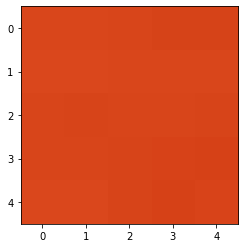

Central moments:
M00: 21.176470588235293
M10: 42.25098039215686
M01: 42.333333333333336
M11: 84.46274509803922
M20: 126.66666666666666
M02: 126.97647058823529
Fragment:  0 1345 Variance:  2.583621683967686e-05 4.6406766628219995e-05 3.405459438677431e-05
Cx:  1.9951851851851852
Cy:  1.9990740740740742


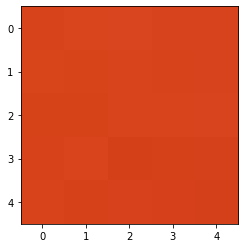

Central moments:
M00: 21.070588235294117
M10: 42.08627450980392
M01: 42.050980392156866
M11: 83.921568627451
M20: 126.17254901960786
M02: 126.06666666666666
Fragment:  0 1350 Variance:  2.942868127643193e-05 3.725336409073434e-05 5.4034602076124563e-05
Cx:  1.997394379303927
Cy:  1.9957193374278803


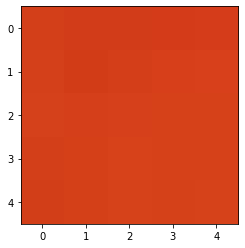

Central moments:
M00: 20.858823529411765
M10: 41.866666666666674
M01: 41.780392156862746
M11: 83.85882352941177
M20: 125.74901960784314
M02: 125.28627450980393
Fragment:  0 1355 Variance:  4.3404844290657643e-05 6.609150326797385e-05 1.4419069588619764e-05
Cx:  2.0071442000376014
Cy:  2.0030080842263582


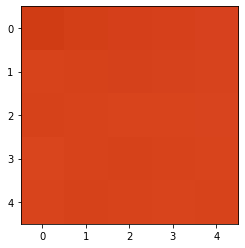

Central moments:
M00: 21.027450980392157
M10: 42.13333333333333
M01: 42.196078431372555
M11: 84.4078431372549
M20: 126.50980392156863
M02: 126.61960784313726
Fragment:  0 1360 Variance:  5.0589773164167603e-05 6.062898885044212e-05 6.274509803921569e-05
Cx:  2.00372995151063
Cy:  2.006713912719135


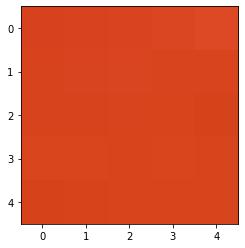

Central moments:
M00: 21.15686274509804
M10: 42.35294117647059
M01: 42.21568627450981
M11: 84.39215686274511
M20: 127.06666666666669
M02: 126.61568627450981
Fragment:  0 1365 Variance:  3.321799307958472e-05 4.059976931949245e-05 9.227220299884664e-05
Cx:  2.0018535681186282
Cy:  1.9953660797034294


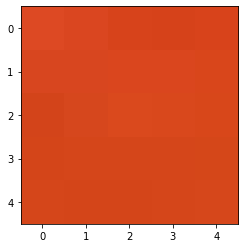

Central moments:
M00: 21.070588235294117
M10: 42.17254901960784
M01: 41.90196078431373
M11: 83.9921568627451
M20: 126.54117647058823
M02: 125.44705882352942
Fragment:  0 1370 Variance:  9.463437139561675e-05 4.0993464052287535e-05 9.95063437139562e-05
Cx:  2.001488926112042
Cy:  1.9886469383956824


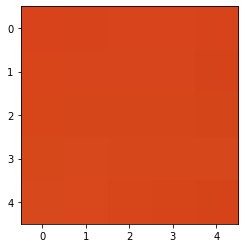

Central moments:
M00: 21.031372549019608
M10: 41.98039215686275
M01: 42.01960784313726
M11: 83.84705882352941
M20: 125.8313725490196
M02: 126.12156862745098
Fragment:  0 1375 Variance:  2.229296424452118e-05 4.0747404844290675e-05 2.0570549788542866e-05
Cx:  1.9960842811859036
Cy:  1.9979489091926161


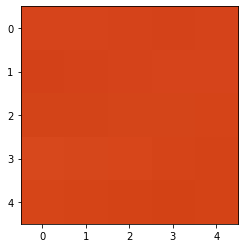

Central moments:
M00: 20.862745098039216
M10: 41.70980392156863
M01: 41.71372549019608
M11: 83.32156862745099
M20: 125.12156862745098
M02: 125.14901960784313
Fragment:  0 1380 Variance:  2.2145328719723275e-05 3.6072279892349053e-05 4.9605536332179925e-05
Cx:  1.999248120300752
Cy:  1.9994360902255641


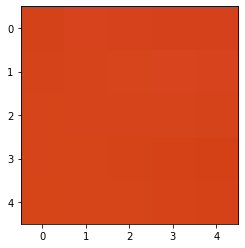

Central moments:
M00: 20.95686274509804
M10: 41.90196078431373
M01: 41.90196078431373
M11: 83.72156862745098
M20: 125.63529411764708
M02: 125.67450980392158
Fragment:  0 1385 Variance:  1.2647443291041816e-05 2.8296808919646217e-05 6.141637831603229e-05
Cx:  1.9994386227544911
Cy:  1.9994386227544911


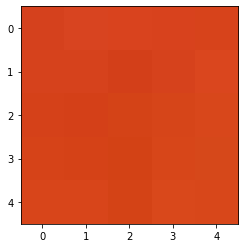

Central moments:
M00: 21.015686274509804
M10: 42.12156862745098
M01: 42.015686274509804
M11: 84.16470588235295
M20: 126.5529411764706
M02: 126.17254901960786
Fragment:  0 1390 Variance:  5.5215686274509645e-05 8.867973856209149e-05 0.0001049196462898885
Cx:  2.0042918454935625
Cy:  1.999253592088076


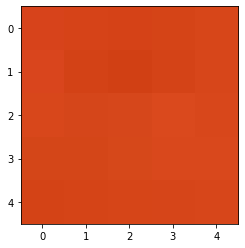

Central moments:
M00: 20.984313725490196
M10: 42.05882352941177
M01: 41.984313725490196
M11: 84.28235294117647
M20: 126.40392156862744
M02: 125.91372549019609
Fragment:  0 1395 Variance:  6.702652825836197e-05 7.465436370626678e-05 8.159323337178009e-05
Cx:  2.0042982620071017
Cy:  2.000747523827322


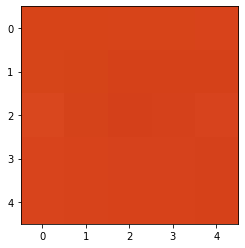

Central moments:
M00: 21.015686274509804
M10: 41.97254901960785
M01: 42.04705882352941
M11: 83.90980392156862
M20: 125.93333333333335
M02: 126.25098039215686
Fragment:  0 1400 Variance:  2.3227989234909485e-05 3.8483660130718986e-05 3.877893118031526e-05
Cx:  1.9972009703302858
Cy:  2.0007464079119237


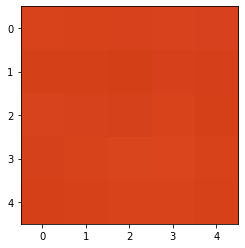

Central moments:
M00: 21.023529411764706
M10: 42.09411764705882
M01: 42.07843137254902
M11: 84.30196078431374
M20: 126.26666666666668
M02: 126.33725490196079
Fragment:  0 1405 Variance:  4.1928489042675715e-05 3.936947327950789e-05 5.2902729719338716e-05
Cx:  2.0022383883603805
Cy:  2.00149225890692


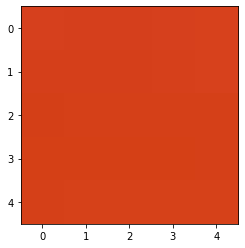

Central moments:
M00: 20.92156862745098
M10: 41.89019607843137
M01: 41.83137254901961
M11: 83.72941176470589
M20: 125.73333333333335
M02: 125.54117647058824
Fragment:  0 1410 Variance:  7.381776239907675e-06 7.381776239907675e-06 7.381776239907729e-05
Cx:  2.0022492970946577
Cy:  1.9994376757263357


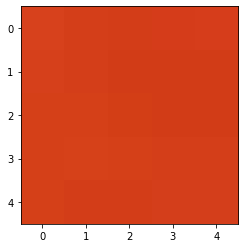

Central moments:
M00: 20.788235294117644
M10: 41.478431372549025
M01: 41.56078431372549
M11: 82.94901960784314
M20: 124.41960784313726
M02: 124.72156862745098
Fragment:  0 1415 Variance:  3.134794309880843e-05 4.2961937716262926e-05 3.676124567474048e-05
Cx:  1.9952839086964729
Cy:  1.999245425391436


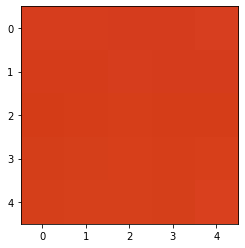

Central moments:
M00: 20.941176470588236
M10: 41.94901960784314
M01: 41.90980392156863
M11: 84.02745098039216
M20: 125.91764705882353
M02: 125.81568627450982
Fragment:  0 1420 Variance:  1.7224144559784576e-05 2.9379469434832767e-05 6.584544405997692e-05
Cx:  2.003183520599251
Cy:  2.0013108614232213


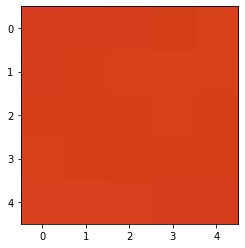

Central moments:
M00: 20.96862745098039
M10: 41.80392156862746
M01: 41.90196078431373
M11: 83.45490196078433
M20: 125.28627450980393
M02: 125.67450980392158
Fragment:  0 1425 Variance:  3.853287197231827e-05 2.8887351018838883e-05 8.242983467896962e-05
Cx:  1.993641294183655
Cy:  1.9983168131662619


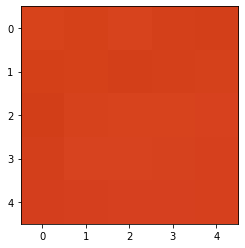

Central moments:
M00: 20.909803921568628
M10: 41.87058823529412
M01: 41.858823529411765
M11: 83.94509803921568
M20: 125.58039215686274
M02: 125.60784313725492
Fragment:  0 1430 Variance:  3.50880430603615e-05 4.0009227220299924e-05 8.159323337178009e-05
Cx:  2.002438109527382
Cy:  2.0018754688672167


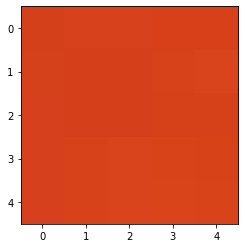

Central moments:
M00: 21.054901960784314
M10: 42.22352941176471
M01: 42.17254901960784
M11: 84.52156862745099
M20: 126.74901960784314
M02: 126.66666666666667
Fragment:  0 1435 Variance:  3.233217993079562e-05 4.2174548250672827e-05 3.2135332564398305e-05
Cx:  2.0054013782827345
Cy:  2.002980070776681


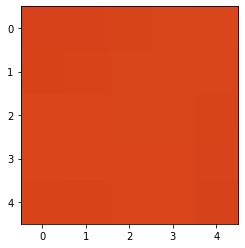

Central moments:
M00: 21.184313725490195
M10: 42.352941176470594
M01: 42.41568627450981
M11: 84.69411764705882
M20: 126.98039215686273
M02: 127.24705882352941
Fragment:  0 1440 Variance:  1.7125720876585804e-05 2.2539023452518192e-05 8.218377547097269e-06
Cx:  1.9992595335061092
Cy:  2.002221399481674


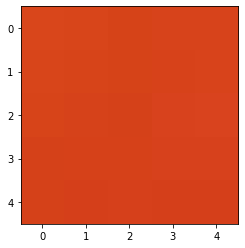

Central moments:
M00: 21.03921568627451
M10: 42.101960784313725
M01: 41.97254901960785
M11: 84.05098039215687
M20: 126.3921568627451
M02: 125.7686274509804
Fragment:  0 1445 Variance:  2.3375624759707638e-05 5.280430603613997e-05 3.1987697039600156e-05
Cx:  2.001118359739049
Cy:  1.9949673811742779


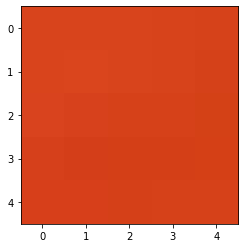

Central moments:
M00: 21.027450980392157
M10: 41.92941176470588
M01: 41.945098039215694
M11: 83.69019607843137
M20: 125.6705882352941
M02: 125.76470588235296
Fragment:  0 1450 Variance:  4.1977700884274976e-05 5.920184544405996e-05 6.889657823913878e-05
Cx:  1.9940320775829914
Cy:  1.994778067885118


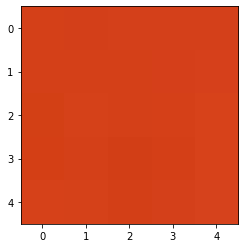

Central moments:
M00: 20.827450980392157
M10: 41.72941176470589
M01: 41.68627450980392
M11: 83.50980392156863
M20: 125.3607843137255
M02: 125.06666666666668
Fragment:  0 1455 Variance:  2.224375240292203e-05 1.46651287966167e-05 4.429065743944636e-05
Cx:  2.003577480700433
Cy:  2.00150630766334


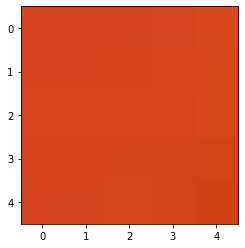

Central moments:
M00: 21.062745098039215
M10: 42.12156862745098
M01: 42.015686274509804
M11: 83.85098039215686
M20: 126.37254901960785
M02: 125.83529411764707
Fragment:  0 1460 Variance:  4.143637062668192e-05 3.700730488273749e-05 5.3542483660130714e-05
Cx:  1.9998138149320426
Cy:  1.9947868180971886


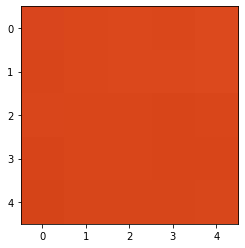

Central moments:
M00: 21.266666666666666
M10: 42.615686274509805
M01: 42.34901960784314
M11: 84.8313725490196
M20: 127.89411764705882
M02: 126.82745098039216
Fragment:  0 1465 Variance:  4.2961937716262885e-05 2.7706266820453666e-05 2.7164936562860434e-05
Cx:  2.0038723953531257
Cy:  1.9913332104001478


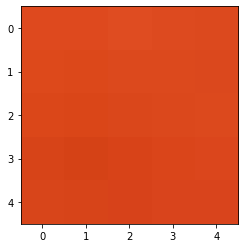

Central moments:
M00: 21.423529411764704
M10: 42.89019607843137
M01: 42.55294117647059
M11: 85.32941176470588
M20: 128.74901960784314
M02: 127.3921568627451
Fragment:  0 1470 Variance:  9.488043060361417e-05 0.00010767550941945394 9.827604767397159e-05
Cx:  2.0020135456708767
Cy:  1.9862712795167492


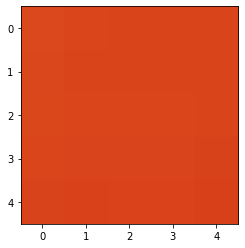

Central moments:
M00: 21.301960784313724
M10: 42.549019607843135
M01: 42.57254901960785
M11: 85.06666666666666
M20: 127.5686274509804
M02: 127.67843137254901
Fragment:  0 1475 Variance:  1.0482122260668898e-05 4.734179161860818e-05 1.2647443291041904e-05
Cx:  1.9974226804123711
Cy:  1.9985272459499268


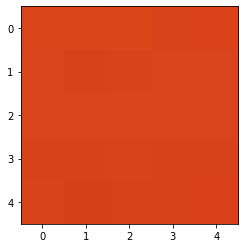

Central moments:
M00: 21.19607843137255
M10: 42.4078431372549
M01: 42.27058823529412
M11: 84.58823529411765
M20: 127.29411764705883
M02: 126.64705882352942
Fragment:  0 1480 Variance:  2.8296808919646092e-05 2.8887351018838856e-05 2.3966166858900426e-05
Cx:  2.000740055504163
Cy:  1.9942645698427384


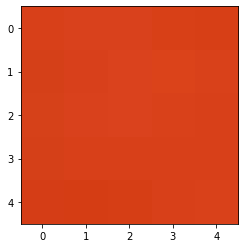

Central moments:
M00: 21.16078431372549
M10: 42.43529411764706
M01: 42.23529411764706
M11: 84.78823529411764
M20: 127.30588235294118
M02: 126.55686274509804
Fragment:  0 1485 Variance:  4.143637062668176e-05 2.8296808919646275e-05 8.080584390618992e-05
Cx:  2.0053743513713864
Cy:  1.9959229058561898


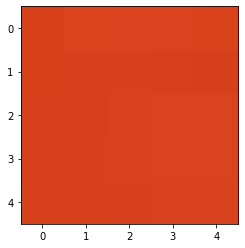

Central moments:
M00: 21.188235294117646
M10: 42.36470588235294
M01: 42.33725490196079
M11: 84.73333333333333
M20: 127.04705882352941
M02: 126.98823529411766
Fragment:  0 1490 Variance:  2.25390234525181e-05 2.7214148404459885e-05 7.667204921184159e-05
Cx:  1.9994447529150474
Cy:  1.998149176383491


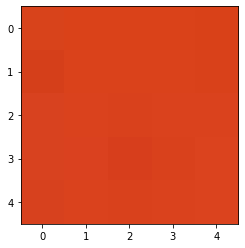

Central moments:
M00: 21.294117647058822
M10: 42.694117647058825
M01: 42.5921568627451
M11: 85.43137254901961
M20: 128.12156862745098
M02: 127.8
Fragment:  0 1495 Variance:  2.829680891964609e-05 1.8552864282968163e-05 6.087504805843906e-05
Cx:  2.004972375690608
Cy:  2.0001841620626153


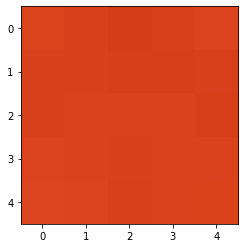

Central moments:
M00: 21.184313725490195
M10: 42.33725490196078
M01: 42.501960784313724
M11: 84.8156862745098
M20: 127.1686274509804
M02: 127.70980392156862
Fragment:  0 1500 Variance:  7.248904267589372e-05 4.798154555940023e-05 4.6406766628219906e-05
Cx:  1.9985190670122177
Cy:  2.0062939651980747


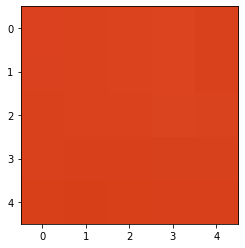

Central moments:
M00: 21.298039215686273
M10: 42.57254901960785
M01: 42.43529411764706
M11: 84.82745098039216
M20: 127.64705882352942
M02: 127.13333333333334
Fragment:  0 1505 Variance:  3.233217993079581e-05 2.9625528642829725e-05 5.792233756247596e-05
Cx:  1.9988952310808326
Cy:  1.9924507457190206


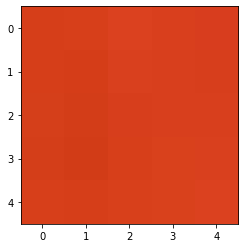

Central moments:
M00: 21.094117647058823
M10: 42.3843137254902
M01: 42.17254901960784
M11: 84.8235294117647
M20: 127.31764705882352
M02: 126.64313725490197
Fragment:  0 1510 Variance:  7.219377162629738e-05 2.7903114186851154e-05 8.060899653979239e-05
Cx:  2.0092954080684144
Cy:  1.999256367354527


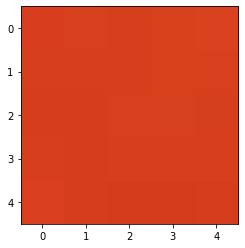

Central moments:
M00: 21.07450980392157
M10: 42.14509803921569
M01: 42.05882352941177
M11: 84.0156862745098
M20: 126.47450980392156
M02: 126.12941176470588
Fragment:  0 1515 Variance:  2.2735870818915643e-05 2.421222606689732e-05 1.761783929257978e-05
Cx:  1.9998139188686268
Cy:  1.9957201339784147


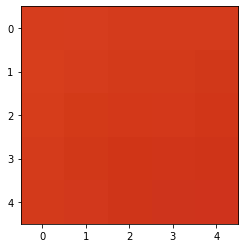

Central moments:
M00: 20.64313725490196
M10: 41.07843137254901
M01: 41.04705882352941
M11: 81.64313725490196
M20: 123.09411764705881
M02: 122.88235294117646
Fragment:  0 1520 Variance:  9.23706266820455e-05 0.0001533933102652826 5.177085736255286e-05
Cx:  1.9899316109422491
Cy:  1.9884118541033438


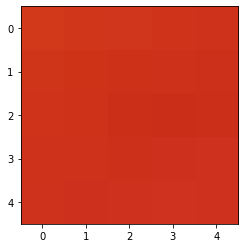

Central moments:
M00: 20.172549019607843
M10: 40.23921568627451
M01: 40.27450980392157
M11: 80.4470588235294
M20: 120.66274509803922
M02: 120.91764705882353
Fragment:  0 1525 Variance:  4.463514033064206e-05 9.094348327566323e-05 6.95363321799308e-05
Cx:  1.9947511664074653
Cy:  1.9965007776049768


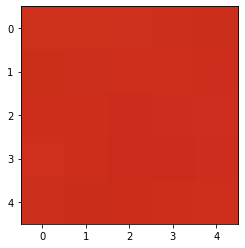

Central moments:
M00: 20.058823529411764
M10: 40.133333333333326
M01: 40.10588235294118
M11: 80.29019607843136
M20: 120.45490196078431
M02: 120.26274509803922
Fragment:  0 1530 Variance:  2.0915032679738726e-05 3.6515186466743554e-05 1.9537101114955787e-05
Cx:  2.0007820136852392
Cy:  1.9994134897360705


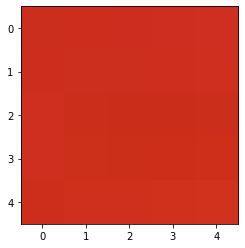

Central moments:
M00: 20.11764705882353
M10: 40.290196078431364
M01: 40.30980392156863
M11: 80.70196078431373
M20: 121.02745098039217
M02: 121.15686274509804
Fragment:  0 1535 Variance:  5.413302575932348e-05 2.4458285274894258e-05 7.490042291426375e-05
Cx:  2.002729044834308
Cy:  2.003703703703704


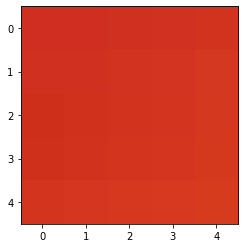

Central moments:
M00: 20.6156862745098
M10: 41.43529411764706
M01: 41.42745098039216
M11: 83.29411764705883
M20: 124.47058823529412
M02: 124.58039215686276
Fragment:  0 1540 Variance:  8.306958861976179e-05 0.0002043767781622453 5.57078046905037e-05
Cx:  2.0098915731405746
Cy:  2.0095111280197835


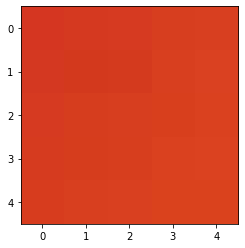

Central moments:
M00: 21.101960784313725
M10: 42.42745098039215
M01: 42.34901960784314
M11: 85.13333333333333
M20: 127.57254901960786
M02: 127.21960784313725
Fragment:  0 1545 Variance:  7.047135717031876e-05 0.00017578469819300272 2.9527104959630953e-05
Cx:  2.0105928266121538
Cy:  2.0068760453447316


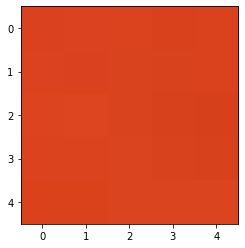

Central moments:
M00: 21.345098039215685
M10: 42.55294117647059
M01: 42.67843137254902
M11: 85.07058823529411
M20: 127.51764705882354
M02: 128.07450980392156
Fragment:  0 1550 Variance:  3.754863514033057e-05 2.3474048442906576e-05 3.725336409073433e-05
Cx:  1.99356972257946
Cy:  1.999448833363954


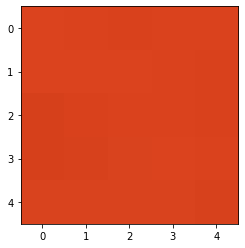

Central moments:
M00: 21.301960784313724
M10: 42.63529411764706
M01: 42.51372549019608
M11: 85.14117647058823
M20: 127.87450980392157
M02: 127.46274509803922
Fragment:  0 1555 Variance:  3.139715494040732e-05 1.4763552479815524e-05 1.4763552479815454e-05
Cx:  2.0014727540500736
Cy:  1.9957658321060385


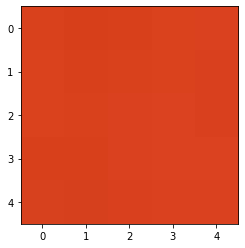

Central moments:
M00: 21.29019607843137
M10: 42.674509803921566
M01: 42.57254901960785
M11: 85.4078431372549
M20: 128.13333333333333
M02: 127.6313725490196
Fragment:  0 1560 Variance:  2.5442522106881784e-05 1.1466359092656726e-05 4.660361399461746e-05
Cx:  2.0044207036286608
Cy:  1.9996316080309453


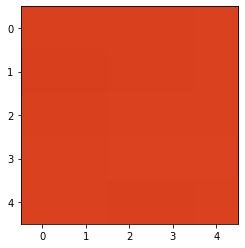

Central moments:
M00: 21.32941176470588
M10: 42.70588235294118
M01: 42.70980392156863
M11: 85.48235294117646
M20: 128.18039215686272
M02: 128.1607843137255
Fragment:  0 1565 Variance:  9.940792003075671e-06 9.940792003075746e-06 9.94079200307574e-06
Cx:  2.0022062879205738
Cy:  2.002390145247288


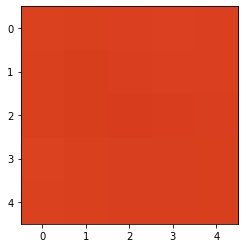

Central moments:
M00: 21.258823529411764
M10: 42.49411764705883
M01: 42.45882352941177
M11: 84.76862745098039
M20: 127.52156862745096
M02: 127.3921568627451
Fragment:  0 1570 Variance:  2.0521337946943337e-05 2.3375624759707793e-05 2.4704344482891207e-05
Cx:  1.9988931931377978
Cy:  1.997232982844494


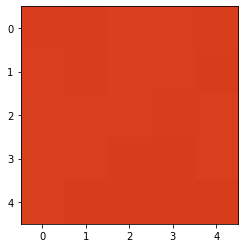

Central moments:
M00: 21.113725490196078
M10: 42.16862745098039
M01: 42.15294117647059
M11: 84.16078431372549
M20: 126.45882352941177
M02: 126.33333333333334
Fragment:  0 1575 Variance:  1.8306805074971035e-05 1.7224144559784695e-05 2.5983852364475203e-05
Cx:  1.9972139673105496
Cy:  1.99647102526003


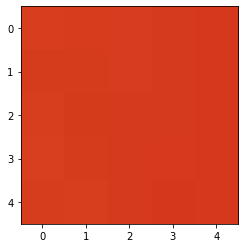

Central moments:
M00: 20.972549019607843
M10: 41.909803921568624
M01: 41.925490196078435
M11: 83.79607843137256
M20: 125.75294117647059
M02: 125.80000000000001
Fragment:  0 1580 Variance:  1.712572087658581e-05 7.199692425990005e-05 1.4665128796616685e-05
Cx:  1.9983171278982796
Cy:  1.9990650710546


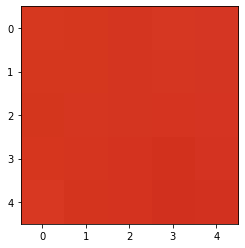

Central moments:
M00: 20.83137254901961
M10: 41.57254901960785
M01: 41.599999999999994
M11: 82.89019607843137
M20: 124.68627450980392
M02: 124.73725490196077
Fragment:  0 1585 Variance:  2.967474048442915e-05 6.805997693194923e-05 4.306036139946178e-05
Cx:  1.9956701807228918
Cy:  1.9969879518072287


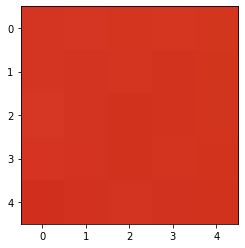

Central moments:
M00: 20.662745098039213
M10: 41.21568627450981
M01: 41.22745098039215
M11: 82.27450980392156
M20: 123.52156862745097
M02: 123.58039215686273
Fragment:  0 1590 Variance:  3.848366013071924e-05 4.921184159938485e-05 7.25874663590927e-05
Cx:  1.994685898652496
Cy:  1.995255266654014


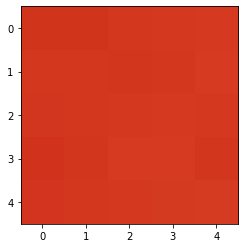

Central moments:
M00: 20.717647058823527
M10: 41.58039215686275
M01: 41.49019607843138
M11: 83.2
M20: 124.85098039215686
M02: 124.49411764705883
Fragment:  0 1595 Variance:  4.148558246828171e-05 7.293194925028838e-05 4.443829296424457e-05
Cx:  2.0070035964414163
Cy:  2.00265000946432


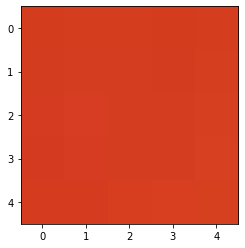

Central moments:
M00: 20.85882352941176
M10: 41.76470588235294
M01: 41.84313725490196
M11: 83.8156862745098
M20: 125.34901960784313
M02: 125.66274509803922
Fragment:  0 1600 Variance:  2.9871587850826637e-05 3.3119569396386e-05 2.844444444444447e-05
Cx:  2.002256063169769
Cy:  2.006016168452717


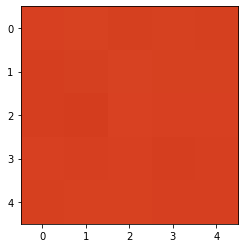

Central moments:
M00: 20.992156862745098
M10: 41.98823529411765
M01: 42.00784313725491
M11: 84.03137254901961
M20: 125.94117647058823
M02: 126.05490196078432
Fragment:  0 1605 Variance:  1.3926951172625814e-05 2.3769319492502867e-05 1.466512879661671e-05
Cx:  2.000186811133944
Cy:  2.001120866803662


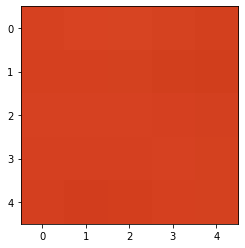

Central moments:
M00: 20.843137254901958
M10: 41.588235294117645
M01: 41.631372549019616
M11: 83.19999999999999
M20: 124.60000000000001
M02: 124.83921568627451
Fragment:  0 1610 Variance:  3.9369473279508075e-05 3.2873510188389055e-05 3.567858515955405e-05
Cx:  1.995296331138288
Cy:  1.997365945437442


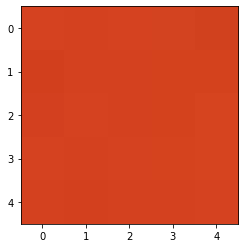

Central moments:
M00: 20.796078431372546
M10: 41.61568627450981
M01: 41.635294117647064
M11: 83.4078431372549
M20: 124.86274509803923
M02: 124.90588235294119
Fragment:  0 1615 Variance:  1.8848135332564562e-05 1.9684736639754e-05 1.5600153787004998e-05
Cx:  2.0011314350367724
Cy:  2.002074297567415


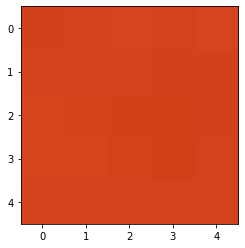

Central moments:
M00: 20.670588235294115
M10: 41.25098039215686
M01: 41.423529411764704
M11: 82.53725490196078
M20: 123.70588235294119
M02: 124.50588235294117
Fragment:  0 1620 Variance:  5.619992310649782e-05 2.091503267973858e-05 4.783391003460209e-05
Cx:  1.9956365016125974
Cy:  2.00398406374502


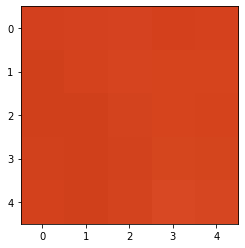

Central moments:
M00: 20.741176470588236
M10: 41.71372549019608
M01: 41.43529411764706
M11: 83.4
M20: 125.33725490196078
M02: 124.33725490196079
Fragment:  0 1625 Variance:  8.129796232218402e-05 7.62783544790466e-05 5.846366782006925e-05
Cx:  2.011155227831348
Cy:  1.9977311401020987


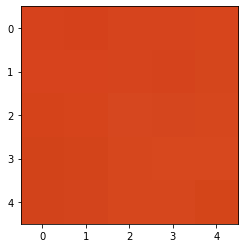

Central moments:
M00: 20.91764705882353
M10: 41.90980392156863
M01: 41.74509803921569
M11: 83.74901960784314
M20: 125.76078431372551
M02: 125.10980392156864
Fragment:  0 1630 Variance:  3.3070357554786784e-05 5.7233371780084595e-05 3.567858515955402e-05
Cx:  2.003562054743157
Cy:  1.9956880389951257


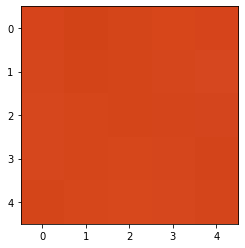

Central moments:
M00: 20.87450980392157
M10: 41.741176470588236
M01: 41.77254901960785
M11: 83.45098039215686
M20: 125.22352941176473
M02: 125.38039215686275
Fragment:  0 1635 Variance:  2.4507497116493716e-05 2.3375624759707868e-05 4.9605536332179925e-05
Cx:  1.9996242720270525
Cy:  2.001127183918843


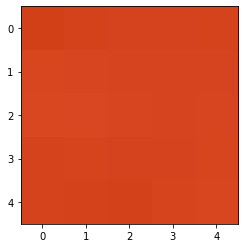

Central moments:
M00: 20.96470588235294
M10: 41.95294117647059
M01: 41.94901960784314
M11: 83.9843137254902
M20: 125.93725490196078
M02: 125.69803921568628
Fragment:  0 1640 Variance:  4.26666666666666e-05 4.266666666666667e-05 8.183929257977702e-05
Cx:  2.0011223344556677
Cy:  2.0009352787130568


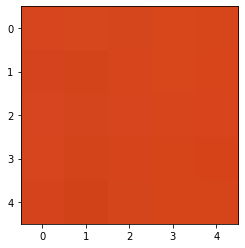

Central moments:
M00: 20.968627450980392
M10: 42.03921568627452
M01: 41.839215686274514
M11: 83.88235294117646
M20: 126.30588235294118
M02: 125.3607843137255
Fragment:  0 1645 Variance:  4.7144944252210725e-05 2.3375624759707797e-05 6.397539407920031e-05
Cx:  2.0048625397419118
Cy:  1.9953244810173931


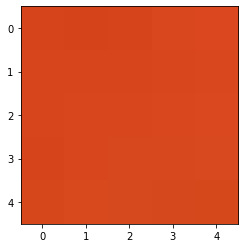

Central moments:
M00: 21.109803921568627
M10: 42.313725490196084
M01: 42.15686274509804
M11: 84.34509803921569
M20: 127.06666666666666
M02: 126.31372549019608
Fragment:  0 1650 Variance:  3.533410226835807e-05 4.438908112264511e-05 3.075740099961553e-05
Cx:  2.0044584804012637
Cy:  1.9970276797324913


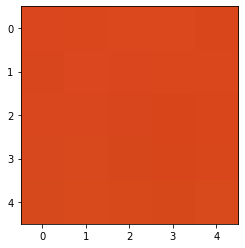

Central moments:
M00: 21.231372549019607
M10: 42.47843137254902
M01: 42.286274509803924
M11: 84.61960784313726
M20: 127.43529411764705
M02: 126.68627450980392
Fragment:  0 1655 Variance:  3.577700884275254e-05 2.6475970780468995e-05 3.016685890042291e-05
Cx:  2.000738825267824
Cy:  1.9916882157369784


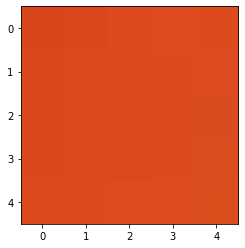

Central moments:
M00: 21.541176470588233
M10: 43.13333333333333
M01: 43.09803921568627
M11: 86.2156862745098
M20: 129.35294117647058
M02: 129.30196078431374
Fragment:  0 1660 Variance:  1.6633602460592327e-05 6.0186082276047686e-05 2.007843137254902e-05
Cx:  2.0023666484616784
Cy:  2.0007281995266704


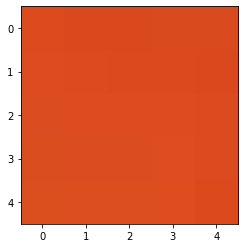

Central moments:
M00: 21.517647058823528
M10: 43.023529411764706
M01: 43.11764705882353
M11: 86.33725490196079
M20: 129.0156862745098
M02: 129.3607843137255
Fragment:  0 1665 Variance:  2.8444444444444735e-05 3.9517108804306034e-05 2.2046905036524417e-05
Cx:  1.9994532531437945
Cy:  2.003827227993439


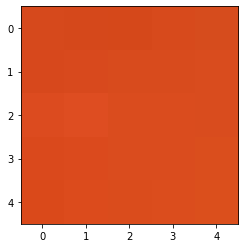

Central moments:
M00: 21.29019607843137
M10: 42.564705882352946
M01: 42.819607843137256
M11: 85.58039215686274
M20: 127.67058823529413
M02: 128.5607843137255
Fragment:  0 1670 Variance:  7.588465974625128e-05 5.2902729719338756e-05 3.361168781237987e-05
Cx:  1.9992632160618902
Cy:  2.01123595505618


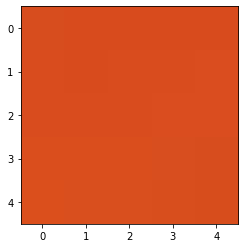

Central moments:
M00: 21.254901960784313
M10: 42.47450980392157
M01: 42.549019607843135
M11: 84.89803921568628
M20: 127.38431372549019
M02: 127.61568627450981
Fragment:  0 1675 Variance:  1.7224144559784576e-05 2.5836216839677085e-05 1.0925028835063438e-05
Cx:  1.998339483394834
Cy:  2.0018450184501844


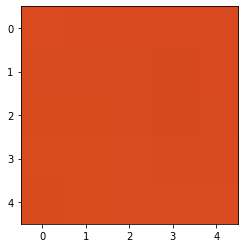

Central moments:
M00: 21.101960784313725
M10: 42.22352941176471
M01: 42.14509803921569
M11: 84.4235294117647
M20: 126.73333333333333
M02: 126.47450980392158
Fragment:  0 1680 Variance:  1.879892349096488e-05 3.503883121876197e-05 1.5993848519800078e-05
Cx:  2.0009291953168558
Cy:  1.9972124140494334


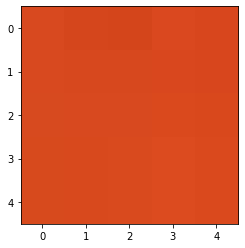

Central moments:
M00: 21.2078431372549
M10: 42.54509803921568
M01: 42.529411764705884
M11: 85.38823529411765
M20: 127.76862745098038
M02: 127.67450980392157
Fragment:  0 1685 Variance:  4.8867358708189066e-05 3.6908881199538644e-05 1.9340253748558245e-05
Cx:  2.006102071005917
Cy:  2.005362426035503


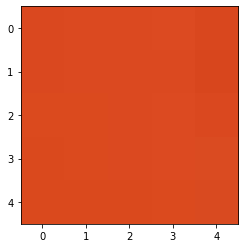

Central moments:
M00: 21.423529411764704
M10: 42.82352941176471
M01: 42.83529411764706
M11: 85.64313725490196
M20: 128.34509803921569
M02: 128.45882352941175
Fragment:  0 1690 Variance:  1.3680891964629049e-05 1.7125720876585967e-05 3.0117647058823565e-05
Cx:  1.9989017023613402
Cy:  1.9994508511806701


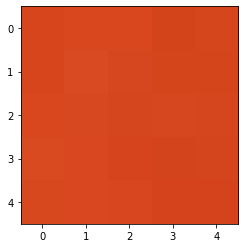

Central moments:
M00: 21.01960784313725
M10: 41.82745098039216
M01: 42.05098039215686
M11: 83.67450980392158
M20: 125.23921568627452
M02: 126.2
Fragment:  0 1695 Variance:  6.274509803921548e-05 5.034371395617079e-05 5.644598231449443e-05
Cx:  1.9899253731343287
Cy:  2.0005597014925374


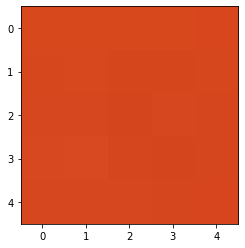

Central moments:
M00: 20.984313725490196
M10: 41.93333333333334
M01: 41.92156862745098
M11: 83.74117647058824
M20: 125.80784313725492
M02: 125.79607843137256
Fragment:  0 1700 Variance:  1.7814686658977195e-05 1.722414455978467e-05 2.8641291810841996e-05
Cx:  1.9983180713885256
Cy:  1.997757428518034


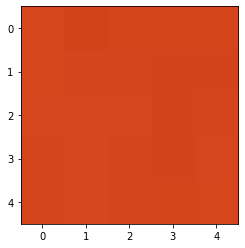

Central moments:
M00: 20.945098039215686
M10: 41.88235294117647
M01: 41.93333333333334
M11: 83.86666666666667
M20: 125.63137254901963
M02: 125.93333333333334
Fragment:  0 1705 Variance:  2.1997693194924967e-05 1.8602076124567498e-05 2.8395232602845058e-05
Cx:  1.99962553828871
Cy:  2.0020595394120955


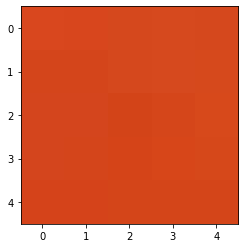

Central moments:
M00: 20.898039215686275
M10: 41.82352941176471
M01: 41.71372549019608
M11: 83.54117647058824
M20: 125.54117647058823
M02: 125.10980392156864
Fragment:  0 1710 Variance:  3.0363706266820313e-05 5.4034602076124536e-05 5.693810073048827e-05
Cx:  2.0013135672734097
Cy:  1.9960592981797713


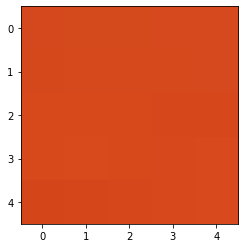

Central moments:
M00: 20.99607843137255
M10: 42.04705882352941
M01: 42.062745098039215
M11: 84.27843137254902
M20: 126.20392156862746
M02: 126.17254901960786
Fragment:  0 1715 Variance:  2.0521337946943337e-05 2.2243752402921936e-05 2.214532871972318e-05
Cx:  2.002614867388868
Cy:  2.003361972357116


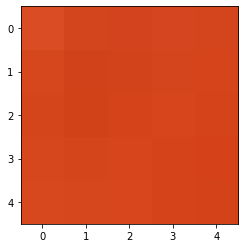

Central moments:
M00: 20.87450980392157
M10: 41.721568627450985
M01: 41.81960784313726
M11: 83.5921568627451
M20: 125.22745098039216
M02: 125.60784313725492
Fragment:  0 1720 Variance:  6.387697039600159e-05 8.351249519415604e-05 9.409304113802385e-05
Cx:  1.9986849520946837
Cy:  2.0033815517565285


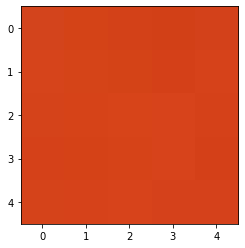

Central moments:
M00: 20.882352941176467
M10: 41.75294117647059
M01: 41.87450980392157
M11: 83.7372549019608
M20: 125.20392156862746
M02: 125.63137254901962
Fragment:  0 1725 Variance:  2.8296808919646404e-05 2.5836216839677105e-05 3.602306805074971e-05
Cx:  1.9994366197183104
Cy:  2.0052582159624417


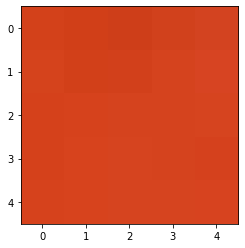

Central moments:
M00: 20.839215686274507
M10: 41.70588235294118
M01: 41.90980392156863
M11: 83.84705882352941
M20: 125.24313725490197
M02: 125.85490196078432
Fragment:  0 1730 Variance:  7.637677816224551e-05 4.099346405228763e-05 8.57270280661284e-05
Cx:  2.001317275122319
Cy:  2.011102747459541


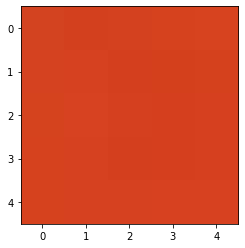

Central moments:
M00: 20.91764705882353
M10: 41.878431372549024
M01: 41.91764705882353
M11: 83.86274509803923
M20: 125.72156862745098
M02: 125.84705882352942
Fragment:  0 1735 Variance:  2.076739715494042e-05 2.3277201076509075e-05 2.0521337946943493e-05
Cx:  2.0020622422197225
Cy:  2.0039370078740157


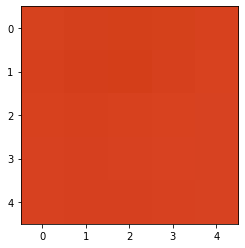

Central moments:
M00: 21.007843137254902
M10: 42.07058823529412
M01: 42.09803921568628
M11: 84.27450980392157
M20: 126.35294117647058
M02: 126.31764705882354
Fragment:  0 1740 Variance:  2.2785082660515026e-05 1.9094194540561388e-05 7.504805843906194e-05
Cx:  2.0026134030240805
Cy:  2.003920104536121


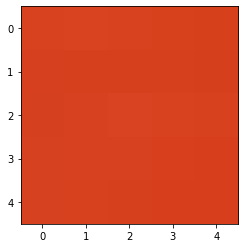

Central moments:
M00: 21.062745098039215
M10: 42.13333333333333
M01: 42.10980392156863
M11: 84.31764705882352
M20: 126.33725490196079
M02: 126.33725490196079
Fragment:  0 1745 Variance:  1.68304498269895e-05 2.8444444444444478e-05 4.837524029219532e-05
Cx:  2.0003723701359153
Cy:  1.9992552597281699


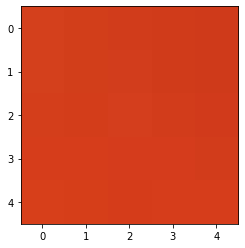

Central moments:
M00: 20.709803921568625
M10: 41.25490196078431
M01: 41.674509803921566
M11: 83.10980392156861
M20: 123.5921568627451
M02: 125.32941176470588
Fragment:  0 1750 Variance:  8.523490965013486e-05 4.094425221068819e-05 1.3139561707035752e-05
Cx:  1.9920469608028784
Cy:  2.0123082749479266


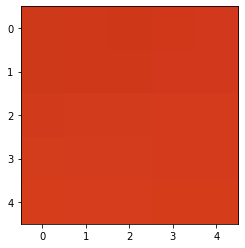

Central moments:
M00: 20.61176470588235
M10: 41.33725490196079
M01: 41.52549019607844
M11: 83.1450980392157
M20: 124.14509803921568
M02: 124.91372549019609
Fragment:  0 1755 Variance:  9.876816608996551e-05 5.846366782006924e-05 3.7499423298731246e-05
Cx:  2.0055175038051756
Cy:  2.0146499238964997


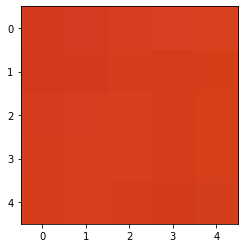

Central moments:
M00: 20.933333333333334
M10: 41.87058823529412
M01: 41.78823529411764
M11: 83.33333333333333
M20: 125.56470588235294
M02: 125.2862745098039
Fragment:  0 1760 Variance:  5.182006920415227e-05 5.6249134948096896e-05 7.637677816224532e-05
Cx:  2.0001873360809292
Cy:  1.996253278381416


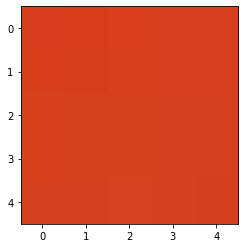

Central moments:
M00: 20.976470588235294
M10: 41.92941176470589
M01: 41.89019607843137
M11: 83.70980392156864
M20: 125.74117647058823
M02: 125.63137254901962
Fragment:  0 1765 Variance:  2.0275278738946416e-05 2.8149173394848146e-05 4.0009227220299877e-05
Cx:  1.9988782950084132
Cy:  1.9970087866891009


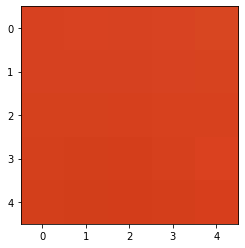

Central moments:
M00: 20.96470588235294
M10: 42.07058823529412
M01: 41.760784313725495
M11: 83.91372549019607
M20: 126.4313725490196
M02: 125.09411764705884
Fragment:  0 1770 Variance:  5.6199923106497534e-05 5.7922337562476024e-05 9.217377931564789e-05
Cx:  2.006734006734007
Cy:  1.9919566030677143


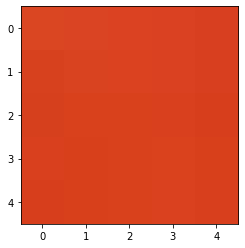

Central moments:
M00: 21.254901960784313
M10: 42.52941176470588
M01: 42.450980392156865
M11: 84.9921568627451
M20: 127.47058823529412
M02: 127.34509803921569
Fragment:  0 1775 Variance:  2.460592079969225e-05 4.675124951941567e-05 9.187850826605155e-05
Cx:  2.000922509225092
Cy:  1.9972324723247235


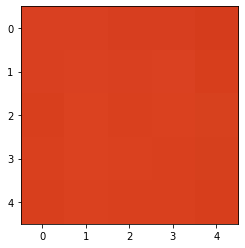

Central moments:
M00: 21.235294117647058
M10: 42.36078431372549
M01: 42.51764705882353
M11: 84.85490196078432
M20: 126.83921568627451
M02: 127.52156862745099
Fragment:  0 1780 Variance:  3.444828911956915e-05 2.9133410226835832e-05 3.799154171472515e-05
Cx:  1.9948291782086796
Cy:  2.0022160664819943


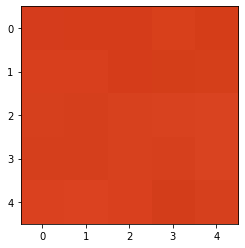

Central moments:
M00: 21.03529411764706
M10: 42.050980392156866
M01: 42.16470588235294
M11: 84.2156862745098
M20: 126.1607843137255
M02: 126.59607843137253
Fragment:  0 1785 Variance:  6.161322568242953e-05 6.73217993079585e-05 7.637677816224528e-05
Cx:  1.9990678598061151
Cy:  2.004474272930649


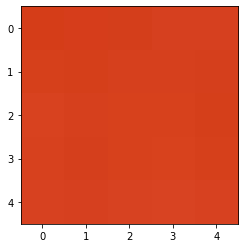

Central moments:
M00: 21.00392156862745
M10: 42.003921568627455
M01: 42.090196078431376
M11: 84.18039215686275
M20: 126.00392156862746
M02: 126.34117647058824
Fragment:  0 1790 Variance:  1.6338331410995653e-05 3.2381391772395226e-05 8.61207227989235e-05
Cx:  1.999813293502614
Cy:  2.0039208364451087


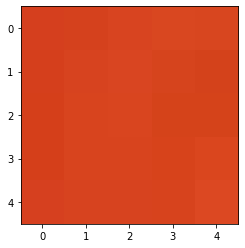

Central moments:
M00: 21.07843137254902
M10: 42.254901960784316
M01: 42.21568627450981
M11: 84.69019607843137
M20: 126.78039215686275
M02: 126.76470588235294
Fragment:  0 1795 Variance:  5.5363321799307746e-05 9.217377931564781e-05 7.627835447904653e-05
Cx:  2.0046511627906978
Cy:  2.0027906976744188


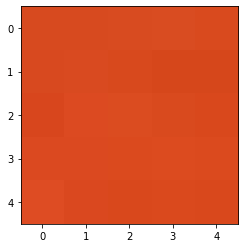

Central moments:
M00: 21.309803921568626
M10: 42.576470588235296
M01: 42.78823529411765
M11: 85.39607843137254
M20: 127.66666666666666
M02: 128.50588235294117
Fragment:  0 1800 Variance:  5.644598231449437e-05 3.690888119953865e-05 5.915263360246064e-05
Cx:  1.9979757085020244
Cy:  2.007913139492087


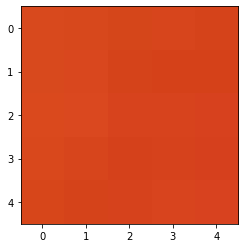

Central moments:
M00: 21.066666666666666
M10: 42.02745098039216
M01: 42.15294117647059
M11: 84.1921568627451
M20: 126.05098039215687
M02: 126.41960784313726
Fragment:  0 1805 Variance:  3.730257593233345e-05 0.0001278031526336024 4.611149557862361e-05
Cx:  1.994973938942666
Cy:  2.0009307520476547


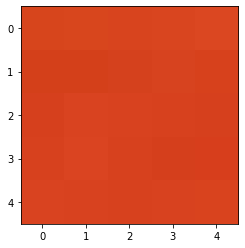

Central moments:
M00: 21.109803921568627
M10: 42.26274509803922
M01: 42.23921568627451
M11: 84.43921568627451
M20: 126.83529411764707
M02: 126.86666666666667
Fragment:  0 1810 Variance:  4.394617454825036e-05 7.248904267589394e-05 5.044213763936951e-05
Cx:  2.0020434701839123
Cy:  2.000928850083597


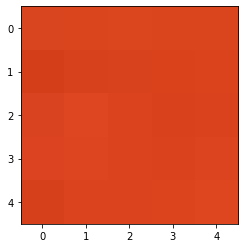

Central moments:
M00: 21.392156862745097
M10: 42.90196078431373
M01: 42.886274509803926
M11: 86.0470588235294
M20: 128.76078431372548
M02: 128.7764705882353
Fragment:  0 1815 Variance:  7.750865051903114e-05 5.78239138792772e-05 5.300115340253752e-05
Cx:  2.0054995417048582
Cy:  2.004766269477544


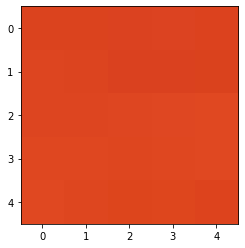

Central moments:
M00: 21.67843137254902
M10: 43.352941176470594
M01: 43.537254901960786
M11: 87.03529411764707
M20: 130.11372549019606
M02: 130.721568627451
Fragment:  0 1820 Variance:  5.4526720492118576e-05 7.504805843906192e-05 3.5334102268358364e-05
Cx:  1.9998191027496384
Cy:  2.0083212735166427


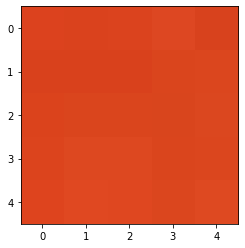

Central moments:
M00: 21.498039215686276
M10: 42.95294117647059
M01: 43.16470588235295
M11: 86.20392156862744
M20: 128.81176470588235
M02: 129.8156862745098
Fragment:  0 1825 Variance:  6.215455594002335e-05 8.735101883890812e-05 4.365090349865439e-05
Cx:  1.99799343305363
Cy:  2.0078438526085374


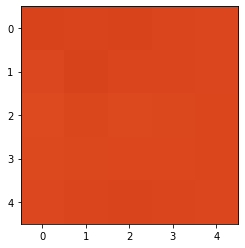

Central moments:
M00: 21.419607843137253
M10: 42.85490196078431
M01: 42.92156862745098
M11: 85.78823529411764
M20: 128.65882352941176
M02: 128.74901960784314
Fragment:  0 1830 Variance:  3.090503652441382e-05 5.3493271818531345e-05 2.0915032679738563e-05
Cx:  2.0007323324789454
Cy:  2.003844745514464


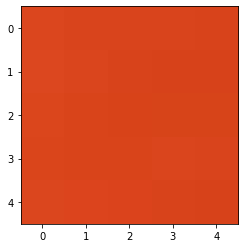

Central moments:
M00: 21.28627450980392
M10: 42.4078431372549
M01: 42.6078431372549
M11: 84.88627450980391
M20: 127.08235294117648
M02: 127.91764705882353
Fragment:  0 1835 Variance:  3.7302575932333654e-05 2.519646289888502e-05 4.0599769319492505e-05
Cx:  1.992262343404569
Cy:  2.0016580692704498


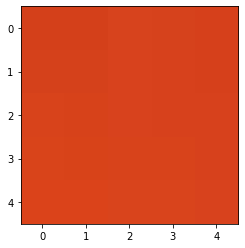

Central moments:
M00: 21.109803921568627
M10: 42.20392156862745
M01: 42.41960784313726
M11: 84.66666666666667
M20: 126.55686274509804
M02: 127.47843137254901
Fragment:  0 1840 Variance:  4.76370626682042e-05 2.5196462898885104e-05 1.909419454056132e-05
Cx:  1.9992569199331227
Cy:  2.0094742708526847


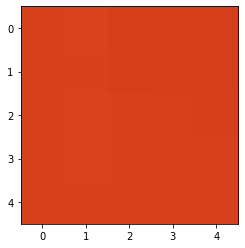

Central moments:
M00: 21.0
M10: 41.90980392156863
M01: 42.10588235294118
M11: 84.10588235294118
M20: 125.61176470588236
M02: 126.40392156862745
Fragment:  0 1845 Variance:  2.7066512879661475e-05 2.706651287966166e-05 3.553094963475586e-05
Cx:  1.9957049486461254
Cy:  2.0050420168067227


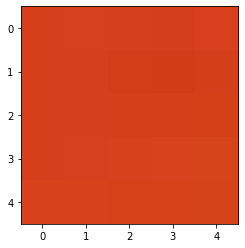

Central moments:
M00: 20.93333333333333
M10: 41.87843137254902
M01: 41.9607843137255
M11: 83.94117647058823
M20: 125.67450980392158
M02: 126.05490196078432
Fragment:  0 1850 Variance:  3.090503652441368e-05 4.025528642829681e-05 4.429065743944636e-05
Cx:  2.0005620082427877
Cy:  2.004496065942301


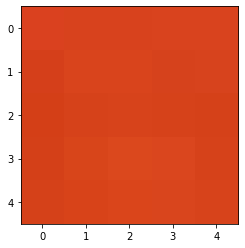

Central moments:
M00: 21.12156862745098
M10: 42.294117647058826
M01: 42.21568627450981
M11: 84.6
M20: 126.75686274509803
M02: 126.75686274509805
Fragment:  0 1855 Variance:  5.915263360246016e-05 6.461514801999226e-05 6.486120722798923e-05
Cx:  2.002413665057557
Cy:  1.9987003341997773


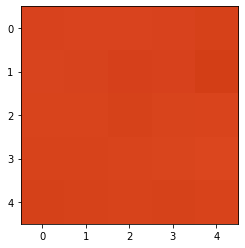

Central moments:
M00: 21.113725490196078
M10: 42.239215686274505
M01: 42.207843137254905
M11: 84.60392156862744
M20: 126.72549019607843
M02: 126.5764705882353
Fragment:  0 1860 Variance:  3.799154171472499e-05 4.1485582468281445e-05 5.300115340253749e-05
Cx:  2.00055720653789
Cy:  1.9990713224368502


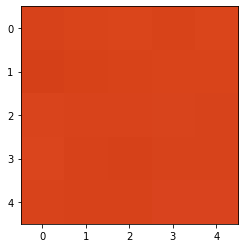

Central moments:
M00: 21.172549019607843
M10: 42.38039215686274
M01: 42.30980392156863
M11: 84.61960784313726
M20: 127.19607843137257
M02: 126.9450980392157
Fragment:  0 1865 Variance:  2.3966166858900253e-05 2.1505574778931117e-05 3.553094963475586e-05
Cx:  2.0016669753658083
Cy:  1.9983330246341917


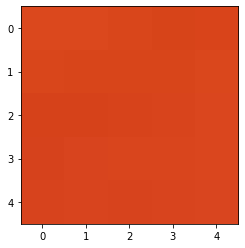

Central moments:
M00: 21.2078431372549
M10: 42.48235294117647
M01: 42.34901960784314
M11: 84.95294117647059
M20: 127.56470588235297
M02: 127.03137254901961
Fragment:  0 1870 Variance:  3.0412918108419618e-05 4.168242983467892e-05 4.3650903498654355e-05
Cx:  2.0031434911242605
Cy:  1.9968565088757397


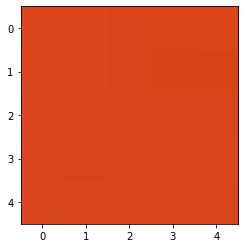

Central moments:
M00: 21.28627450980392
M10: 42.51372549019608
M01: 42.576470588235296
M11: 85.09803921568627
M20: 127.55686274509802
M02: 127.79215686274509
Fragment:  0 1875 Variance:  1.7617839292579653e-05 2.8641291810841935e-05 7.741022683583238e-05
Cx:  1.9972365512159176
Cy:  2.000184229918939


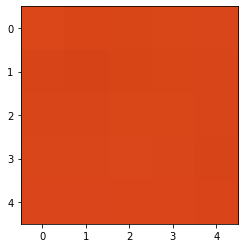

Central moments:
M00: 21.24313725490196
M10: 42.46666666666666
M01: 42.54117647058824
M11: 85.02745098039216
M20: 127.3686274509804
M02: 127.78039215686275
Fragment:  0 1880 Variance:  2.0570549788542723e-05 1.732256824298354e-05 2.913341022683583e-05
Cx:  1.9990769798781611
Cy:  2.0025844563411486


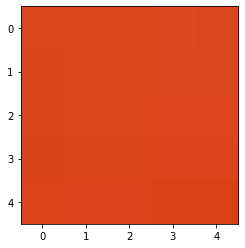

Central moments:
M00: 21.32156862745098
M10: 42.69019607843137
M01: 42.53333333333333
M11: 85.12156862745098
M20: 128.08627450980393
M02: 127.45098039215686
Fragment:  0 1885 Variance:  2.5983852364475196e-05 4.340484429065743e-05 4.197770088427528e-05
Cx:  2.0022070995034027
Cy:  1.9948501011587272


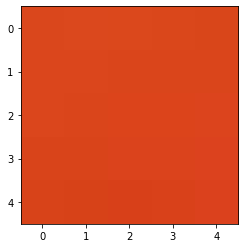

Central moments:
M00: 21.392156862745097
M10: 42.83921568627451
M01: 42.72156862745098
M11: 85.68235294117648
M20: 128.58039215686273
M02: 127.9843137254902
Fragment:  0 1890 Variance:  2.7066512879661726e-05 6.874894271434067e-05 2.952710495963091e-05
Cx:  2.0025664527956004
Cy:  1.9970669110907424


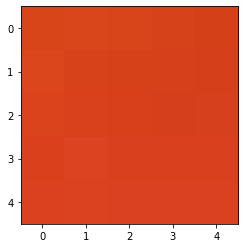

Central moments:
M00: 21.215686274509803
M10: 42.25098039215687
M01: 42.61960784313726
M11: 84.97254901960784
M20: 126.58823529411765
M02: 128.09411764705882
Fragment:  0 1895 Variance:  7.381776239907688e-05 6.28927335640139e-05 0.00011333487120338338
Cx:  1.991497227356747
Cy:  2.0088724584103517


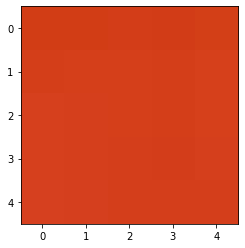

Central moments:
M00: 20.8156862745098
M10: 41.61176470588236
M01: 41.71372549019608
M11: 83.30588235294118
M20: 124.87450980392157
M02: 125.10980392156863
Fragment:  0 1900 Variance:  2.426143790849694e-05 1.8602076124567468e-05 9.261668589004228e-05
Cx:  1.9990580256217036
Cy:  2.0039562923888474


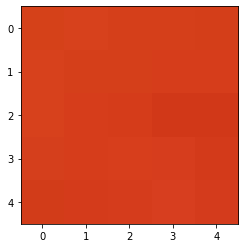

Central moments:
M00: 20.87843137254902
M10: 41.682352941176475
M01: 41.71764705882353
M11: 83.36078431372549
M20: 124.89803921568628
M02: 125.11372549019609
Fragment:  0 1905 Variance:  4.488119953863912e-05 9.458515955401764e-05 3.813917723952326e-05
Cx:  1.9964312546957177
Cy:  1.998121712997746


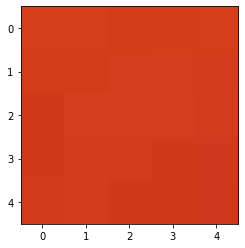

Central moments:
M00: 20.77254901960784
M10: 41.48627450980392
M01: 41.443137254901956
M11: 82.74901960784314
M20: 124.30196078431374
M02: 124.13333333333333
Fragment:  0 1910 Variance:  5.2066128412149484e-05 6.584544405997692e-05 4.6406766628219906e-05
Cx:  1.9971682084198605
Cy:  1.995091561261091


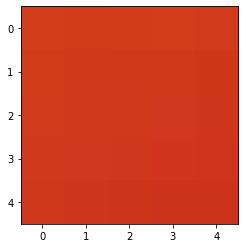

Central moments:
M00: 20.49019607843137
M10: 40.87843137254902
M01: 40.84313725490196
M11: 81.39999999999999
M20: 122.50980392156862
M02: 122.29411764705881
Fragment:  0 1915 Variance:  4.0599769319492214e-05 0.0001211595540176855 3.307035755478663e-05
Cx:  1.995023923444976
Cy:  1.9933014354066987


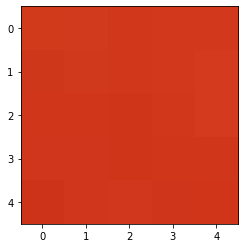

Central moments:
M00: 20.43921568627451
M10: 41.0
M01: 40.77647058823529
M11: 81.75686274509803
M20: 123.14117647058825
M02: 122.21176470588235
Fragment:  0 1920 Variance:  3.705651672433678e-05 5.0343713956170655e-05 3.282429834678969e-05
Cx:  2.0059478127398314
Cy:  1.9950115118956255


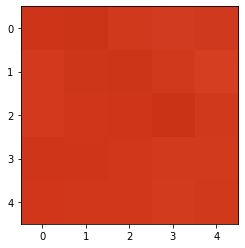

Central moments:
M00: 20.376470588235293
M10: 40.78431372549019
M01: 40.84705882352941
M11: 81.68235294117648
M20: 122.51764705882353
M02: 122.64313725490194
Fragment:  0 1925 Variance:  9.06482122260668e-05 0.00010565782391387928 0.00010177008842752791
Cx:  2.001539645881447
Cy:  2.004618937644342


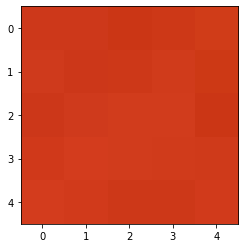

Central moments:
M00: 20.270588235294117
M10: 40.51372549019607
M01: 40.69803921568627
M11: 81.21176470588235
M20: 121.51764705882351
M02: 122.22745098039215
Fragment:  0 1930 Variance:  8.154402153018039e-05 5.7922337562475956e-05 8.70065359477124e-05
Cx:  1.9986457728767653
Cy:  2.0077384407041983


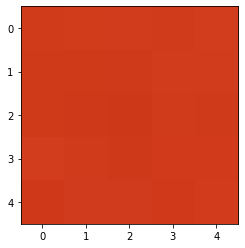

Central moments:
M00: 20.388235294117646
M10: 40.83921568627451
M01: 40.76470588235294
M11: 81.65098039215685
M20: 122.65098039215687
M02: 122.37254901960783
Fragment:  0 1935 Variance:  2.5196462898884863e-05 2.716493656286045e-05 3.3857747020376775e-05
Cx:  2.0030775149067126
Cy:  1.9994229659549916


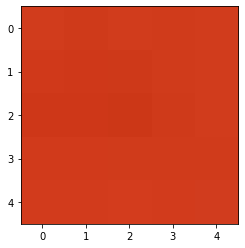

Central moments:
M00: 20.4078431372549
M10: 40.83921568627451
M01: 40.89411764705882
M11: 81.78823529411764
M20: 122.60392156862744
M02: 122.91764705882352
Fragment:  0 1940 Variance:  3.65151864667433e-05 4.0452133794694316e-05 4.0206074586697415e-05
Cx:  2.001152959262106
Cy:  2.0038431975403537


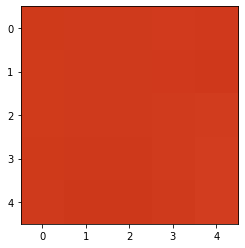

Central moments:
M00: 20.333333333333332
M10: 40.752941176470586
M01: 40.63529411764706
M11: 81.50980392156862
M20: 122.4470588235294
M02: 121.84313725490195
Fragment:  0 1945 Variance:  2.3375624759707638e-05 2.5737793156478295e-05 2.8198385236447516e-05
Cx:  2.0042430086788814
Cy:  1.998457087753134


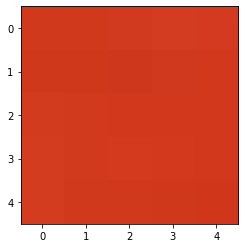

Central moments:
M00: 20.509803921568626
M10: 41.06666666666666
M01: 41.03137254901961
M11: 81.98823529411764
M20: 123.30980392156863
M02: 123.07058823529411
Fragment:  0 1950 Variance:  4.059976931949241e-05 3.484198385236447e-05 4.3454056132256837e-05
Cx:  2.0022944550669215
Cy:  2.0005736137667305


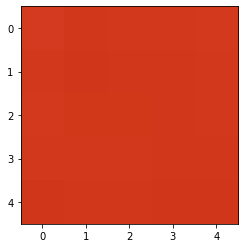

Central moments:
M00: 20.53333333333333
M10: 41.043137254901964
M01: 40.996078431372545
M11: 81.92941176470588
M20: 123.16078431372549
M02: 122.90980392156862
Fragment:  0 1955 Variance:  1.486197616301421e-05 1.4911188004613607e-05 3.060976547481738e-05
Cx:  1.9988540870893816
Cy:  1.9965622612681437


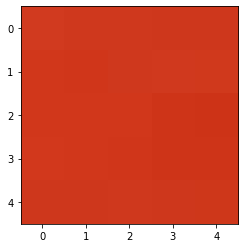

Central moments:
M00: 20.32549019607843
M10: 40.52941176470588
M01: 40.6156862745098
M11: 81.0078431372549
M20: 121.47058823529412
M02: 121.72156862745098
Fragment:  0 1960 Variance:  2.9182622068435008e-05 4.099346405228759e-05 5.693810073048827e-05
Cx:  1.994018907968358
Cy:  1.9982635539262974


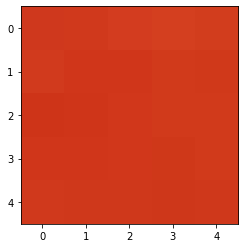

Central moments:
M00: 20.415686274509802
M10: 40.89019607843137
M01: 40.725490196078425
M11: 81.47450980392156
M20: 122.70196078431374
M02: 122.08235294117645
Fragment:  0 1965 Variance:  2.9871587850826528e-05 9.360092272203002e-05 4.2223760092272196e-05
Cx:  2.0028812908182867
Cy:  1.994813676527084


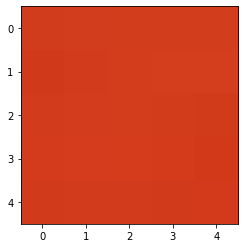

Central moments:
M00: 20.635294117647057
M10: 41.29803921568627
M01: 41.29803921568627
M11: 82.6
M20: 123.85490196078432
M02: 123.84705882352941
Fragment:  0 1970 Variance:  2.4753556324490796e-05 2.9379469434832753e-05 1.5403306420607456e-05
Cx:  2.0013302926643863
Cy:  2.0013302926643863


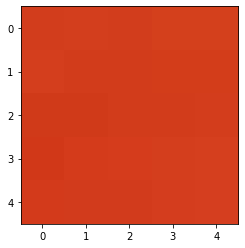

Central moments:
M00: 20.670588235294115
M10: 41.443137254901956
M01: 41.3686274509804
M11: 82.98431372549021
M20: 124.45490196078433
M02: 124.19215686274511
Fragment:  0 1975 Variance:  2.9133410226836093e-05 5.4280661284121505e-05 3.936947327950788e-05
Cx:  2.0049326503509772
Cy:  2.0013280212483404


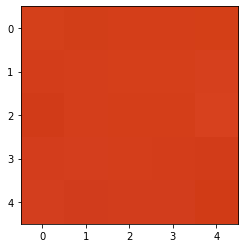

Central moments:
M00: 20.729411764705883
M10: 41.51764705882353
M01: 41.36078431372549
M11: 82.76078431372548
M20: 124.60000000000001
M02: 123.88627450980391
Fragment:  0 1980 Variance:  3.331641676278383e-05 3.0757400999615495e-05 6.382775855440215e-05
Cx:  2.002837684449489
Cy:  1.9952705259175179


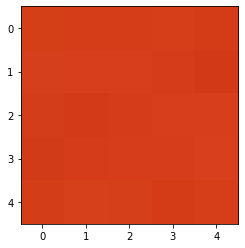

Central moments:
M00: 20.88235294117647
M10: 41.858823529411765
M01: 41.76470588235294
M11: 83.83137254901962
M20: 125.5764705882353
M02: 125.27058823529413
Fragment:  0 1985 Variance:  4.306036139946188e-05 3.976316801230296e-05 5.378854286812764e-05
Cx:  2.004507042253521
Cy:  2.0


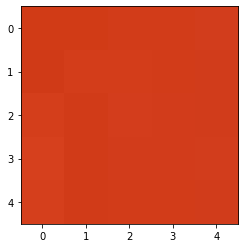

Central moments:
M00: 20.596078431372547
M10: 41.133333333333326
M01: 41.2313725490196
M11: 82.23529411764704
M20: 123.3607843137255
M02: 123.70980392156861
Fragment:  0 1990 Variance:  2.6968089196463007e-05 2.524567474048443e-05 5.496962706651288e-05
Cx:  1.997143945163747
Cy:  2.001904036557502


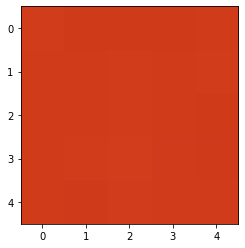

Central moments:
M00: 20.4
M10: 40.78431372549019
M01: 40.8156862745098
M11: 81.60392156862744
M20: 122.31372549019606
M02: 122.4313725490196
Fragment:  0 1995 Variance:  9.743944636678133e-06 9.743944636678204e-06 1.07281814686659e-05
Cx:  1.9992310649750096
Cy:  2.00076893502499


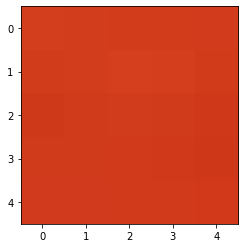

Central moments:
M00: 20.498039215686273
M10: 40.996078431372545
M01: 40.90196078431372
M11: 81.81176470588235
M20: 122.90196078431373
M02: 122.71372549019607
Fragment:  0 2000 Variance:  3.804075355632445e-05 5.413302575932332e-05 2.9527104959630912e-05
Cx:  2.0
Cy:  1.9954084560933614


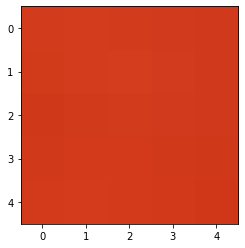

Central moments:
M00: 20.541176470588233
M10: 41.00392156862745
M01: 41.09411764705882
M11: 82.0078431372549
M20: 122.7764705882353
M02: 123.36862745098037
Fragment:  0 2005 Variance:  3.336562860438287e-05 2.829680891964628e-05 3.567858515955402e-05
Cx:  1.9961817487590683
Cy:  2.0005727376861397


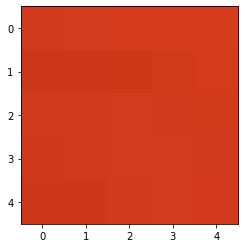

Central moments:
M00: 20.48627450980392
M10: 41.180392156862744
M01: 40.882352941176464
M11: 82.15686274509804
M20: 123.70588235294117
M02: 122.6549019607843
Fragment:  0 2010 Variance:  8.548096885813142e-05 5.305036524413687e-05 5.03437139561707e-05
Cx:  2.010145482388974
Cy:  1.9955972434915772


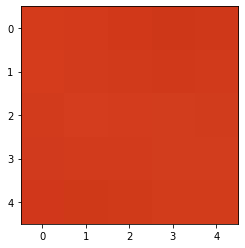

Central moments:
M00: 20.545098039215684
M10: 41.00392156862745
M01: 41.08235294117647
M11: 82.19607843137254
M20: 122.95686274509805
M02: 123.14509803921567
Fragment:  0 2015 Variance:  3.823760092272205e-05 4.921184159938486e-05 3.971395617070357e-05
Cx:  1.9958007253292613
Cy:  1.9996182477572055


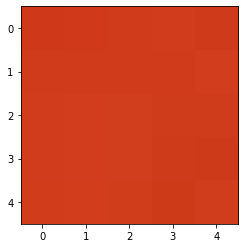

Central moments:
M00: 20.4
M10: 40.71764705882353
M01: 40.79607843137255
M11: 81.30196078431372
M20: 122.04313725490196
M02: 122.35686274509803
Fragment:  0 2020 Variance:  2.9428681276431933e-05 3.307035755478663e-05 2.706651287966167e-05
Cx:  1.9959630911188007
Cy:  1.9998077662437526


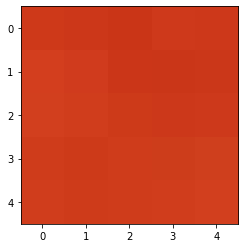

Central moments:
M00: 20.20392156862745
M10: 40.29019607843137
M01: 40.549019607843135
M11: 80.99607843137255
M20: 120.90980392156862
M02: 121.79607843137255
Fragment:  0 2025 Variance:  8.602229911572459e-05 0.00013548019992310652 5.723337178008458e-05
Cx:  1.9941770186335404
Cy:  2.0069875776397517


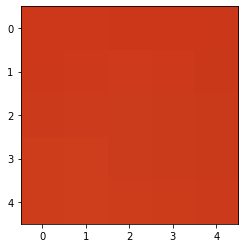

Central moments:
M00: 19.980392156862745
M10: 39.82352941176471
M01: 39.96078431372549
M11: 79.61568627450981
M20: 119.24313725490197
M02: 119.97647058823529
Fragment:  0 2030 Variance:  3.567858515955432e-05 7.199692425990004e-05 1.564936562860438e-05
Cx:  1.9931305201177627
Cy:  2.0


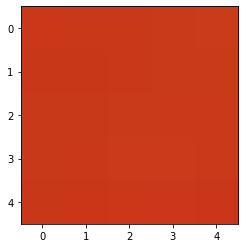

Central moments:
M00: 19.745098039215684
M10: 39.56078431372549
M01: 39.52941176470588
M11: 79.26666666666667
M20: 118.72156862745098
M02: 118.68235294117646
Fragment:  0 2035 Variance:  1.7224144559784576e-05 2.962552864282967e-05 1.4369857747020376e-05
Cx:  2.003574975173784
Cy:  2.0019860973187686


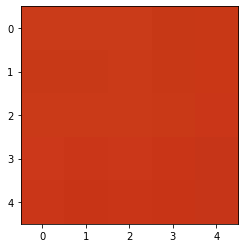

Central moments:
M00: 19.713725490196076
M10: 39.32941176470588
M01: 39.41176470588235
M11: 78.5529411764706
M20: 117.86274509803921
M02: 118.14901960784312
Fragment:  0 2040 Variance:  3.1889273356401255e-05 7.716416762783546e-05 1.9783160322952705e-05
Cx:  1.9950268549830914
Cy:  1.9992042967972947


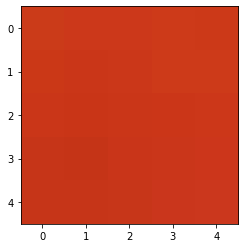

Central moments:
M00: 19.811764705882354
M10: 39.807843137254906
M01: 39.40392156862745
M11: 79.30196078431374
M20: 119.65098039215687
M02: 117.97647058823529
Fragment:  0 2045 Variance:  8.356170703575553e-05 5.329642445213379e-05 3.1889273356401384e-05
Cx:  2.009303246239113
Cy:  1.9889152810768014


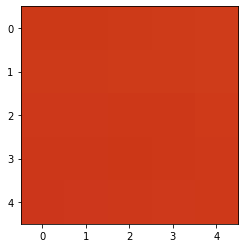

Central moments:
M00: 20.12156862745098
M10: 40.34901960784313
M01: 40.219607843137254
M11: 80.62745098039215
M20: 121.18823529411765
M02: 120.62745098039215
Fragment:  0 2050 Variance:  1.3877739331026428e-05 3.9960015378700494e-05 2.327720107650904e-05
Cx:  2.0052621321379847
Cy:  1.99883063730267


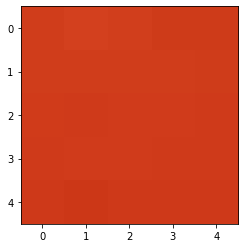

Central moments:
M00: 20.32156862745098
M10: 40.6
M01: 40.54117647058823
M11: 81.08627450980391
M20: 121.71372549019608
M02: 121.45882352941176
Fragment:  0 2055 Variance:  2.6475970780468863e-05 5.649519415609379e-05 2.6180699730872738e-05
Cx:  1.9978772674642997
Cy:  1.9949826321883444


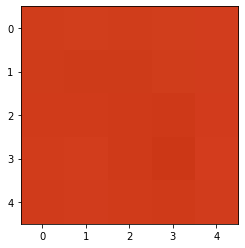

Central moments:
M00: 20.396078431372548
M10: 40.831372549019605
M01: 40.78823529411764
M11: 81.5921568627451
M20: 122.65098039215684
M02: 122.41960784313724
Fragment:  0 2060 Variance:  3.6269127258746375e-05 3.705651672433678e-05 4.19284890426759e-05
Cx:  2.0019227071716976
Cy:  1.99980772928283


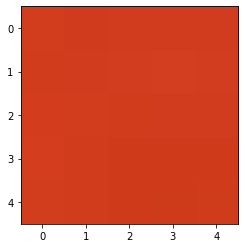

Central moments:
M00: 20.48235294117647
M10: 40.87450980392157
M01: 40.89019607843137
M11: 81.47450980392156
M20: 122.6
M02: 122.52156862745097
Fragment:  0 2065 Variance:  3.188927335640127e-05 1.712572087658595e-05 4.6160707420222985e-05
Cx:  1.9955964005360907
Cy:  1.9963622439211184


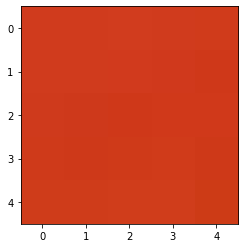

Central moments:
M00: 20.337254901960783
M10: 40.67058823529412
M01: 40.60392156862745
M11: 81.1843137254902
M20: 121.95686274509802
M02: 121.76470588235293
Fragment:  0 2070 Variance:  1.3631680123029508e-05 2.9527104959630922e-05 5.5363321799307956e-05
Cx:  1.9998071731585039
Cy:  1.9965291168530659


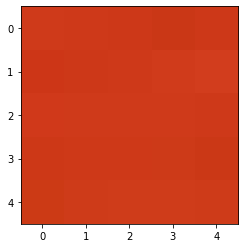

Central moments:
M00: 20.192156862745097
M10: 40.38823529411765
M01: 40.38823529411765
M11: 80.8156862745098
M20: 121.15686274509804
M02: 121.09411764705882
Fragment:  0 2075 Variance:  3.9960015378700446e-05 3.951710880430605e-05 4.493041138023837e-05
Cx:  2.0001942124684406
Cy:  2.0001942124684406


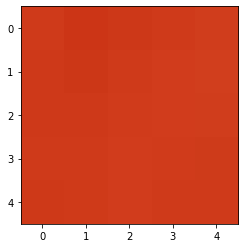

Central moments:
M00: 20.298039215686273
M10: 40.69019607843137
M01: 40.64313725490196
M11: 81.40392156862745
M20: 122.14901960784314
M02: 121.92941176470588
Fragment:  0 2080 Variance:  3.134794309880793e-05 5.7233371780084555e-05 4.4192233756247594e-05
Cx:  2.0046367851622873
Cy:  2.002318392581144


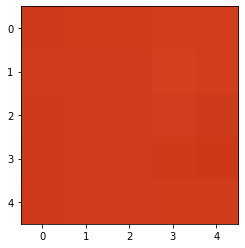

Central moments:
M00: 20.352941176470587
M10: 40.78039215686274
M01: 40.70196078431373
M11: 81.46666666666667
M20: 122.30196078431374
M02: 122.15294117647058
Fragment:  0 2085 Variance:  3.936947327950761e-05 3.6908881199538624e-05 3.444828911956939e-05
Cx:  2.0036608863198455
Cy:  1.9998073217726398


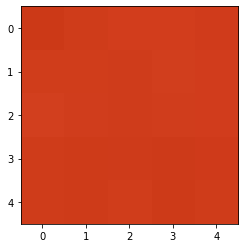

Central moments:
M00: 20.337254901960783
M10: 40.71372549019607
M01: 40.588235294117645
M11: 81.14509803921568
M20: 122.19607843137256
M02: 121.6313725490196
Fragment:  0 2090 Variance:  3.7007304882737146e-05 2.76570549788543e-05 3.6564398308342944e-05
Cx:  2.001928268414963
Cy:  1.9957578094870807


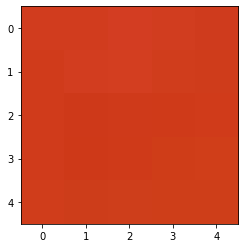

Central moments:
M00: 20.36078431372549
M10: 40.68627450980392
M01: 40.58039215686274
M11: 81.11764705882352
M20: 122.01176470588236
M02: 121.6
Fragment:  0 2095 Variance:  3.533410226835807e-05 3.8139177239523244e-05 0.00010546097654748171
Cx:  1.9982665639445303
Cy:  1.9930662557781202


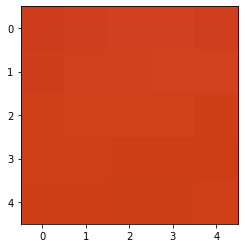

Central moments:
M00: 20.396078431372548
M10: 40.807843137254906
M01: 40.65882352941176
M11: 81.22745098039215
M20: 122.3843137254902
M02: 121.6470588235294
Fragment:  0 2100 Variance:  7.194771241830043e-05 1.7568627450980328e-05 0.0001384329104190696
Cx:  2.0007690828686795
Cy:  1.9934627956162276


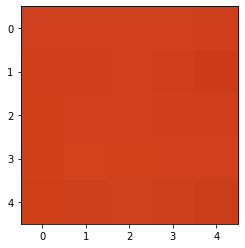

Central moments:
M00: 20.356862745098038
M10: 40.58823529411765
M01: 40.62352941176471
M11: 81.0235294117647
M20: 121.49803921568628
M02: 121.65882352941176
Fragment:  0 2105 Variance:  6.13671664744328e-05 3.2873510188389035e-05 5.413302575932334e-05
Cx:  1.9938354844923911
Cy:  1.995569254478906


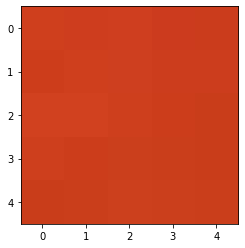

Central moments:
M00: 20.03921568627451
M10: 39.90196078431373
M01: 39.92156862745098
M11: 79.56470588235294
M20: 119.45490196078431
M02: 119.52156862745096
Fragment:  0 2110 Variance:  8.119953863898517e-05 3.13479430988081e-05 3.946789696270665e-05
Cx:  1.9911937377690805
Cy:  1.9921722113502935


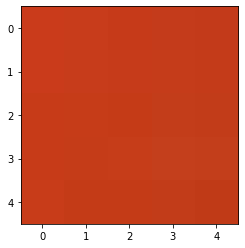

Central moments:
M00: 19.32941176470588
M10: 38.37647058823529
M01: 38.529411764705884
M11: 76.51372549019607
M20: 114.87058823529412
M02: 115.43921568627451
Fragment:  0 2115 Variance:  8.818762014609766e-05 2.0767397154940404e-05 3.3857747020376775e-05
Cx:  1.985392574558734
Cy:  1.9933049300060866


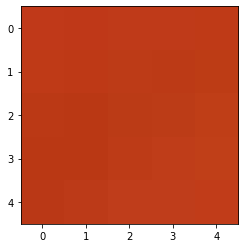

Central moments:
M00: 18.568627450980394
M10: 37.278431372549015
M01: 37.07058823529412
M11: 74.66274509803921
M20: 112.02352941176471
M02: 111.30588235294118
Fragment:  0 2120 Variance:  7.012687427912356e-05 6.038292964244524e-05 5.743021914648212e-05
Cx:  2.007602956705385
Cy:  1.9964097148891233


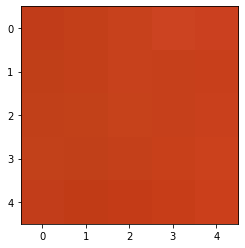

Central moments:
M00: 19.345098039215685
M10: 39.14901960784314
M01: 38.627450980392155
M11: 78.15686274509804
M20: 117.93333333333334
M02: 115.89803921568627
Fragment:  0 2125 Variance:  0.0002026543637062669 6.028450595924636e-05 8.085505574778933e-05
Cx:  2.0237178187715386
Cy:  1.9967565376038923


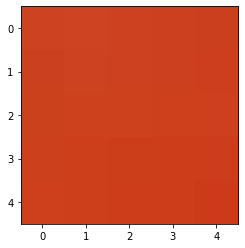

Central moments:
M00: 20.07450980392157
M10: 40.16470588235294
M01: 40.17647058823529
M11: 80.41176470588235
M20: 120.47843137254904
M02: 120.56862745098039
Fragment:  0 2130 Variance:  1.1417147251057389e-05 7.381776239907721e-05 4.586543637062669e-05
Cx:  2.0007814026176987
Cy:  2.0013674545809725


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [29]:
showImage(image)
fragments = 5
for i in range(0, image.shape[0], 5):
	for j in range(615, image.shape[1], 5):
		mini_fragment = image[i:i+fragments, j:j+fragments, :]
		showImage(mini_fragment)
		variance_r = np.var(mini_fragment[:,:,0])  # wariancja kolorów dla kanału R
		variance_g = np.var(mini_fragment[:,:,1])  # wariancja kolorów dla kanału G
		variance_b = np.var(mini_fragment[:,:,2])  # wariancja kolorów dla kanału B


		M_red = cv2.moments(mini_fragment[:,:,0])
		M_green = cv2.moments(mini_fragment[:,:,1])
		M_blue = cv2.moments(mini_fragment[:,:,2])

		print("Fragment: ", i, j, "Variance: ", variance_r, variance_g, variance_b)
		
		print("Cx: ", M_red['m10']/M_red['m00'])
		print("Cy: ", M_red['m01']/M_red['m00'])
		print("Cx: ", M_green['m10']/M_green['m00'])
		print("Cy: ", M_green['m01']/M_green['m00'])
		print("Cx: ", M_blue['m10']/M_blue['m00'])
		print("Cy: ", M_blue['m01']/M_blue['m00'])


		